In [ ]:
# 序列化数据示例，生成绘图所需数据数据；方便后面数据使用，本次大部分绘图使用序列化后数据；相应序列化后数据已提供
import pickle
import time
import pymongo

def get_ready(ch='video_hot',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
    
get_ready() # 连接 mongodb

play = []
results = mycol.find({})
for i,j in enumerate(results):
    play.append(j['senddate'])
with open(r'C:\Users\yc\Desktop\senddate.txt', 'wb') as f:
    pickle.dump(play, f)

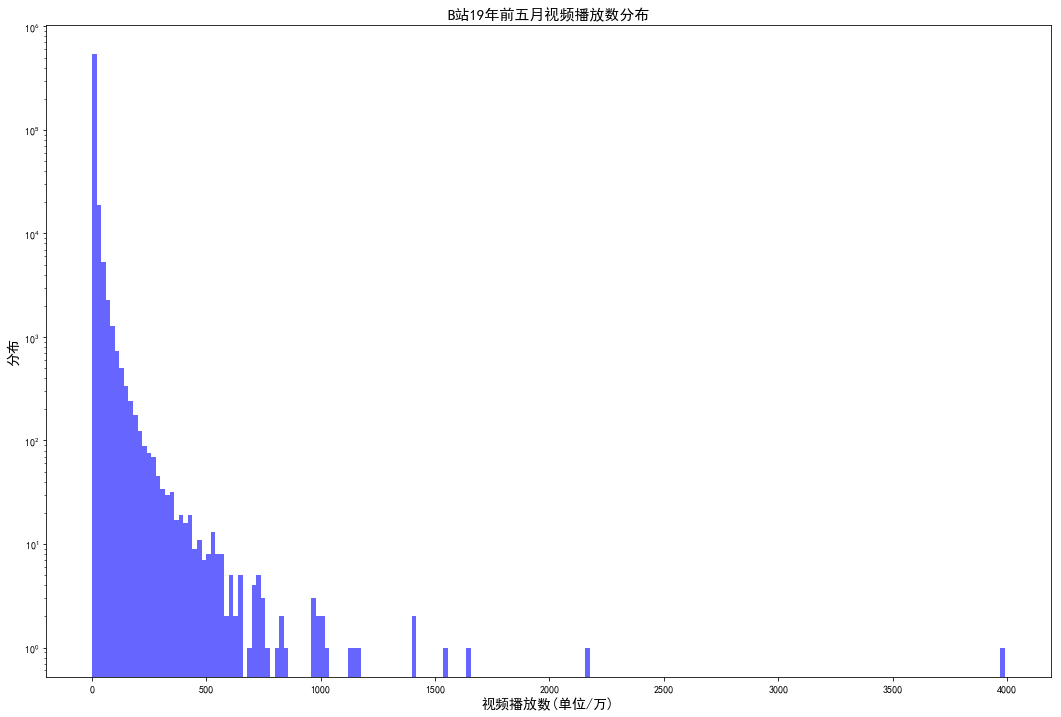

In [148]:
# b 站 2019 年内六月之前发布视频播放数绘制直方图
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.mlab as mlab
import pickle
#序列化数据(播放数)调用
with open(r'C:\Users\yc\Desktop\i.txt', 'rb') as f:
    play = pickle.load(f)
#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸
# plt.rcParams['figure.dpi'] = 300 #分辨率
# plt.rcParams['savefig.dpi'] = 300 #图片像素

# 直方图       
x = [y/10000 for y in play]
num_bins = 200
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.6) # alpha透明度，浮点数

plt.xscale('linear')
plt.yscale('log') # y 轴 log 刻度
plt.xlabel('视频播放数(单位/万)', fontsize=14)
plt.ylabel('分布', fontsize=14)
plt.title(r'B站19年前五月视频播放数分布', fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\play_distribution.png', dpi=300)
plt.show()

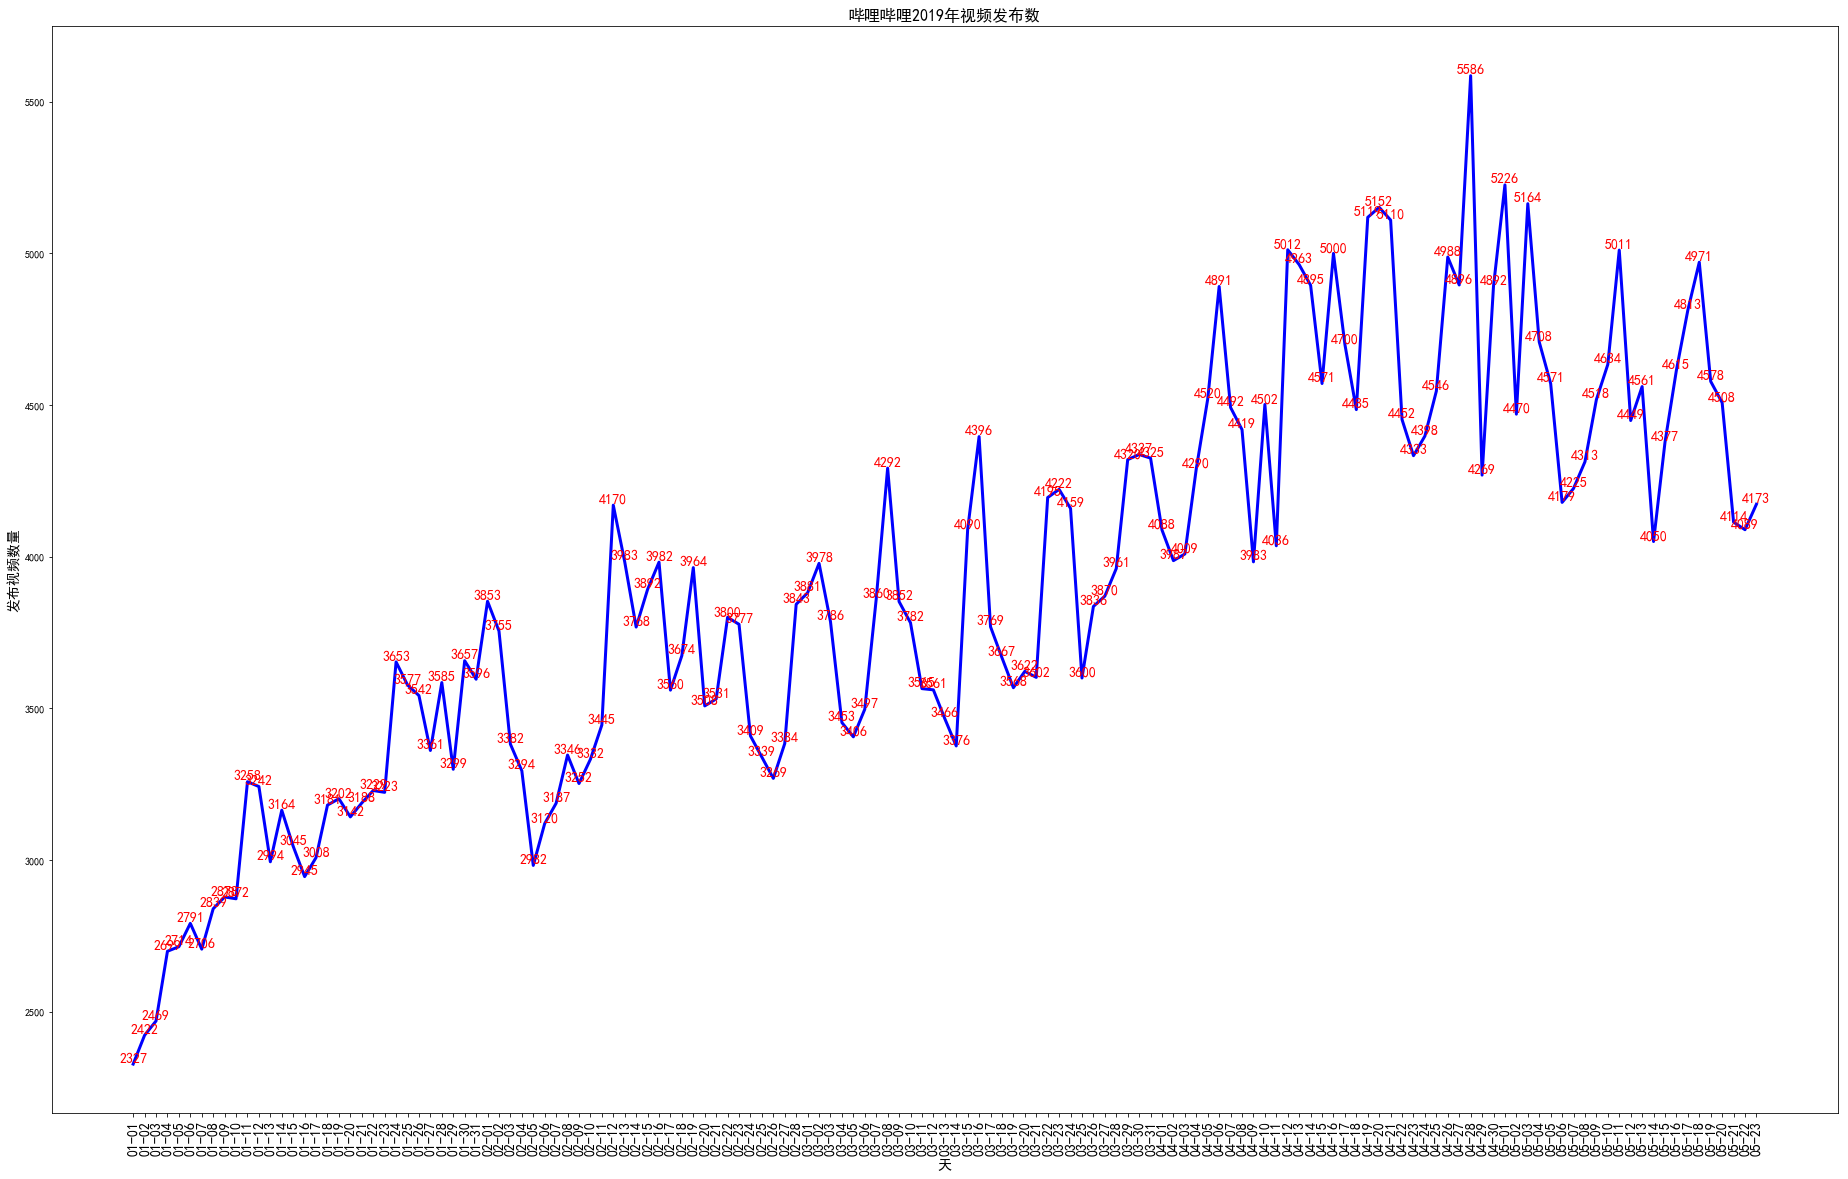

In [17]:
# b 站 2019 年内六月之前发布视频播放数---统计每天
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import time

with open(r'C:\Users\yc\Desktop\iday.txt', 'rb') as f: # 发布日期及发布视频数
    send = pickle.load(f) 
send_count = sorted(send.items(), key=lambda item:item[0]) # 每天发布视频数 
x,y = [],[]
for sen in send_count:
    # 时间戳转时间
    timestamp = sen[0]
    time_local = time.localtime(timestamp)
    dt = time.strftime("%m-%d",time_local)# %Y- %H:%M:%S
    x.append(dt) # 发布日期
    y.append(sen[1]) # 次数
x = x[:-5]
y = y[:-5]
#显示图形
%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文

#X轴，Y轴数据

plt.figure(figsize=(32,20)) #创建绘图对象
plt.xticks(range(len(x)), x, rotation=90, fontsize=14) # 横坐标
plt.plot(x,y,"b",linewidth=3)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线'b--'，线宽度）
plt.xlabel("天", fontsize=14) #X轴标签
plt.ylabel("发布视频数量", fontsize=14)  #Y轴标签
plt.title("哔哩哔哩2019年视频发布数",fontsize=16) #图标题

for i,(_x,_y) in enumerate(zip([i for i in range(len(x))],y)):  
    plt.text(_x,_y,y[i],color='red',ha='center', va= 'bottom',fontsize=14,)  #将数值显示在图形上
    
plt.savefig(r'C:\Users\yc\Desktop\send.png', dpi=300) #指定分辨率保存  
plt.show()  #显示图

In [ ]:
# bilibili 2016-2019各月视频发布量 
import requests
import time
import pymongo
import random
def get_ready(ch='video_pub',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
    
get_ready() # 连接 mongodb

a1,a2,a3,a4,a5 = 0,0,0,0,0
results = mycol.find({})
for ri,result in enumerate(results):
    a1 += result['36'] 
    a2 += result['37']
    a3 += result['38']
    a4 += result['39']
    a5 += result['41']
print(a1,',',a2,',',a3,',',a4,',',a5,',')

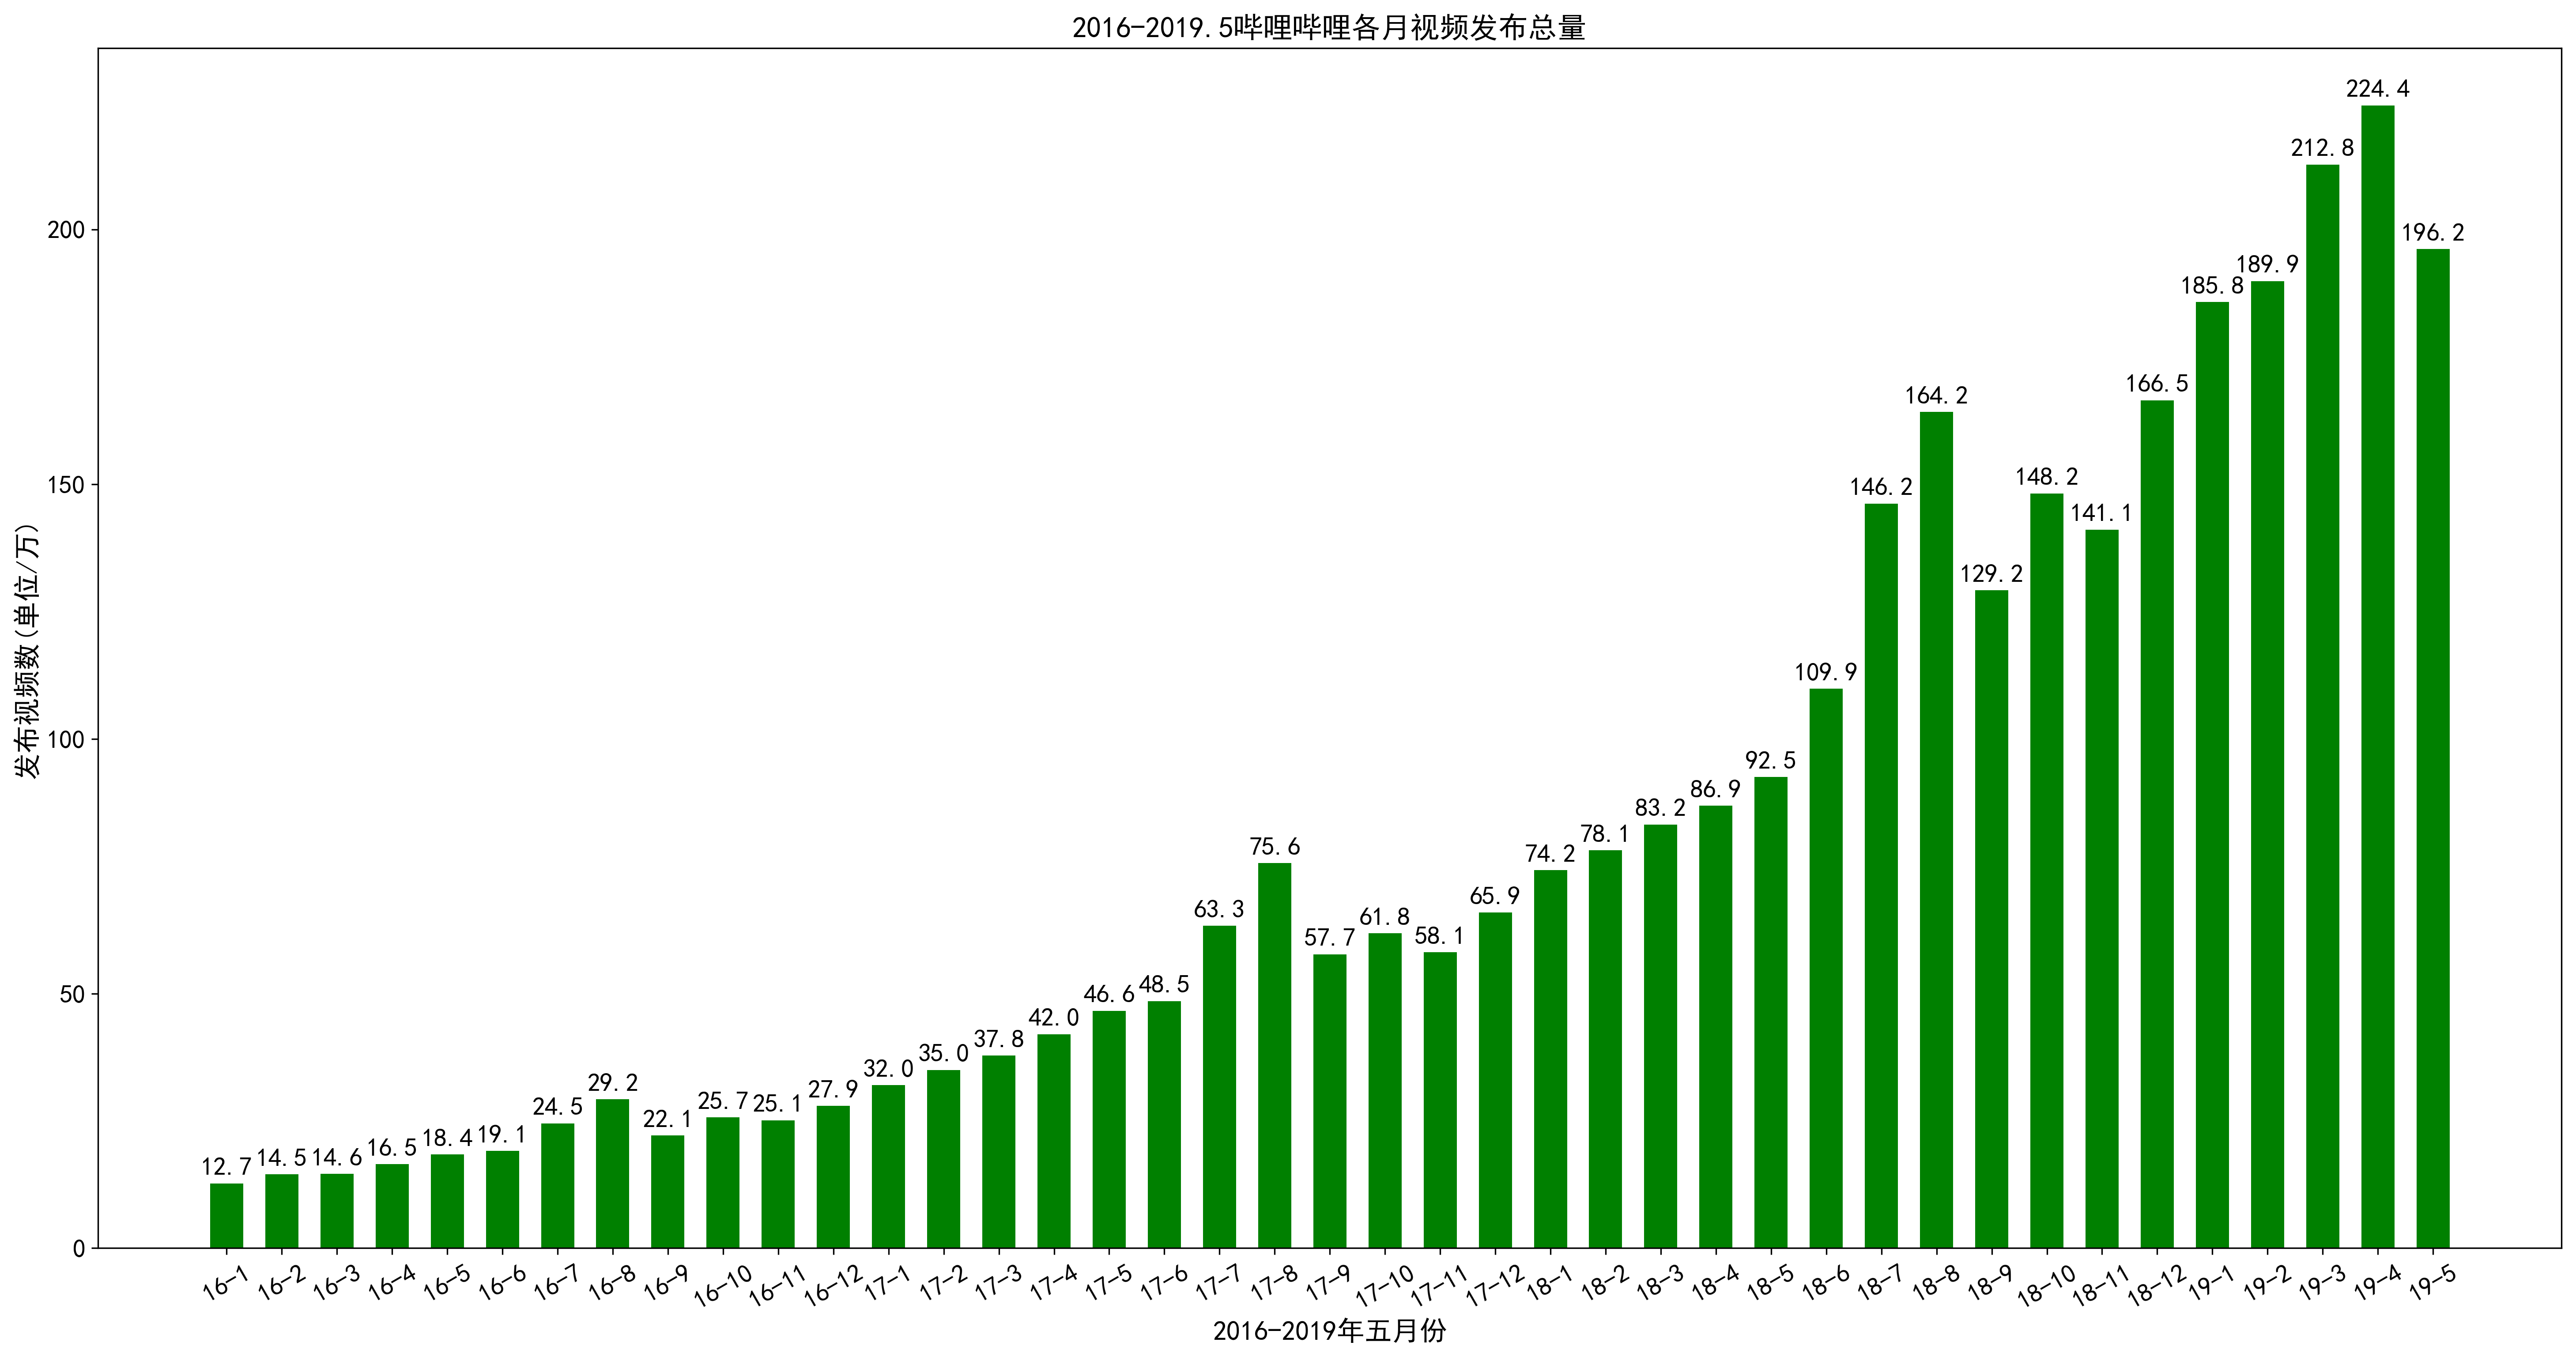

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (24.0, 12.0) # 设置figure_size尺寸
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['savefig.dpi'] = 300 #图片像素

# 图像设置 五月数据需要修改一下
data2 =[127142 , 144981 , 146485 , 165215 , 184462, 191287 , 244826 , 292480 , 220947 , 256718 ,250960 , 279373 , 320269 , 349943 , 377656 ,419977 , 466125 , 485402 , 632708 , 756006 ,577287 , 617933 , 581094 , 658854 , 741934 ,781362 , 831892 , 869494 , 924825 , 1099378 ,1462424 , 1642323 , 1291676 , 1481535 , 1411200 ,1665379 , 1857529 , 1898728 , 2128177 , 2243507 , 1961631] # 2018-2019每月b站视频发布总数

data = [round(da/10000,1) for da in data2] # 扩大单位
    
rects = plt.bar(range(len(data)), data, width=0.6, fc='g') # 条形图

plt.xticks(range(len(data)), ['16-1', '16-2', '16-3', '16-4', '16-5', '16-6', '16-7', '16-8', '16-9', '16-10', '16-11', '16-12','17-1', '17-2', '17-3', '17-4', '17-5', '17-6', '17-7', '17-8', '17-9', '17-10', '17-11', '17-12','18-1','18-2','18-3','18-4','18-5','18-6','18-7','18-8','18-9','18-10','18-11','18-12','19-1','19-2','19-3','19-4','19-5'], rotation=30,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("2016-2019年五月份",fontsize=15)
plt.ylabel("发布视频数(单位/万)",fontsize=15)
plt.title("2016-2019.5哔哩哔哩各月视频发布总量",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=14)
plt.savefig(r'C:\Users\yc\Desktop\pub_total.png', dpi=300) #指定分辨率保存
plt.show()

In [ ]:
# 按星期与按小时发布视频数据获取
import time
import pymongo
import random
def get_ready(ch='video_hot',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready() # 连接 mongodb
total = mycol.find({})
hours= {'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0,'13':0,'14':0,'15':0,'16':0,'17':0,'18':0,'19':0,'20':0,'21':0,'22':0,'23':0,'00':0}
week = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'0':0}
all = mycol.find({})
for ae in all:
    timestamp = ae['senddate']
    time_local = time.localtime(timestamp)
    day = time.strftime("%d",time_local)
    month = time.strftime("%m",time_local)
    if month != '05': #不计算5月
        days[day] += 1

print(days) 

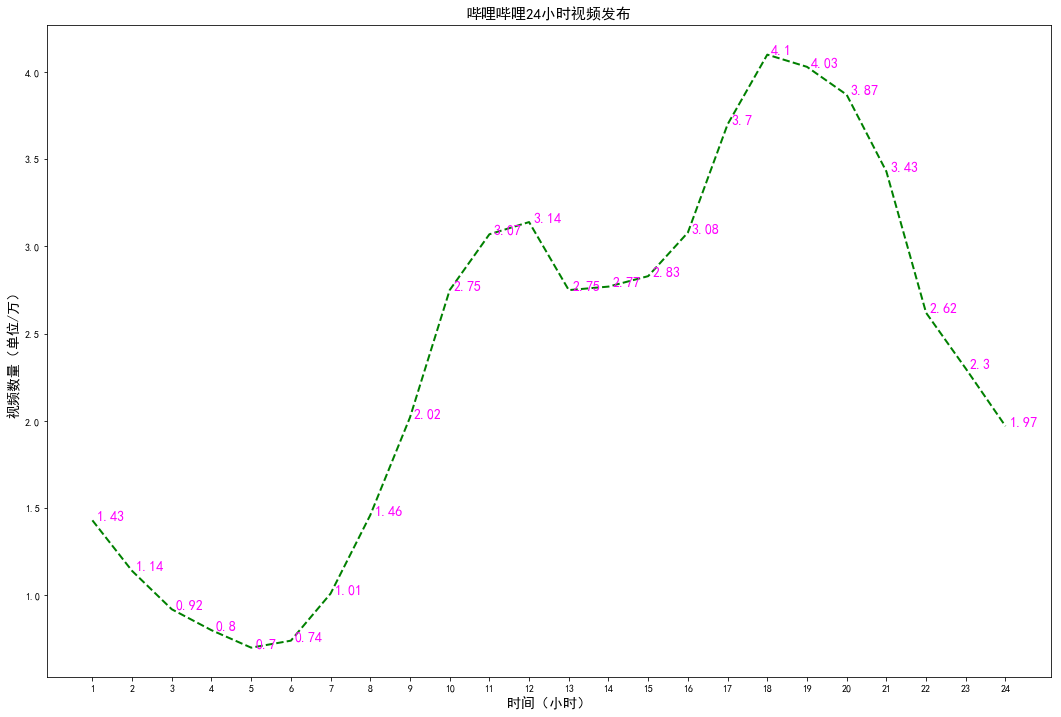

In [13]:
#哔哩哔哩24小时视频发布
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#显示图形
%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
#X轴，Y轴数据
x = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
y2 = [14264,11426,9165,7951,6976,7352,10133,14593,20179,27452,30653,31402,27514,27690,28338,30823,37013,40968,40264,38656,34305,26246,23042,19725]

y = [round(y3/10000,2) for y3 in y2]

plt.figure(figsize=(18,12)) #创建绘图对象
plt.xticks(range(24), x) # 横坐标
points = plt.plot(x,y,"g--",linewidth=2)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("时间（小时）",fontsize=14) #X轴标签
plt.ylabel("视频数量（单位/万）",fontsize=14)  #Y轴标签
plt.title("哔哩哔哩24小时视频发布",fontsize=15) #图标题

for i,(_x,_y) in enumerate(zip([i for i in range(len(x))],y)):  
    plt.text(_x+0.1,_y,y[i],color='magenta',fontsize=14,)  #将数值显示在图形上

plt.savefig(r'C:\Users\yc\Desktop\hour_total.png', dpi=300) #指定分辨率保存  
plt.show()  #显示图


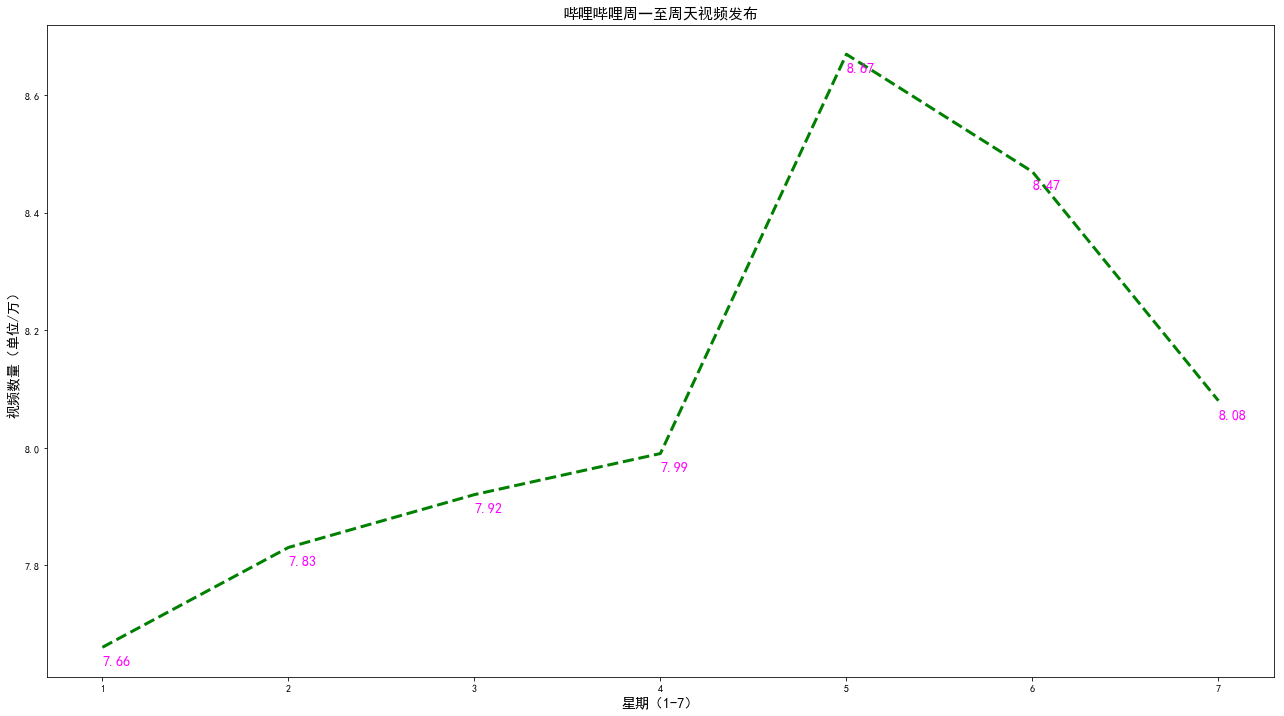

In [20]:
#哔哩哔哩星期视频发布
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#显示图形
%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
#X轴，Y轴数据
x = ['1','2','3','4','5','6','7']
y2 = [76641,78336,79189,79859,86656,84688,80761]

y = [round(y3/10000,2) for y3 in y2]

plt.figure(figsize=(22,12)) #创建绘图对象
plt.xticks(range(7), x) # 横坐标
plt.plot(x,y,"g--",linewidth=3)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("星期（1-7）",fontsize=14) #X轴标签
plt.ylabel("视频数量（单位/万）",fontsize=14)  #Y轴标签
plt.title("哔哩哔哩周一至周天视频发布",fontsize=15) #图标题

for i,(_x,_y) in enumerate(zip([i for i in range(len(x))],y)):  
    plt.text(_x,_y-0.03,y[i],color='magenta',fontsize=14,)  #将数值显示在图形上
    
plt.savefig(r'C:\Users\yc\Desktop\total_week.png', dpi=300) #指定分辨率保存  
plt.show()  #显示图

In [ ]:
# 一万以上播放量视频 生成标签数据数据-------------------------------------1w--------------------------------------------------
import time
import pymongo
import random
import pickle
def get_ready(ch='video_hot',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready() # 连接 mongodb
ss = mycol.find({})
tags, counts = {},{}
for i,j in enumerate(ss):
    for t in j['tag'].split(','): #遍历tags
        if '.' in t:
            t = t.replace('.','-')
        elif '$' in t:
            t = t.replace('$','631')
        if t in tags:
            tags[t] += j['play']
            counts[t] += 1
        else:
            tags[t] = j['play']
            counts[t] = 1

with open(r'C:\Users\yc\Desktop\tags.txt', 'wb') as f:
    pickle.dump(tags, f)
with open(r'C:\Users\yc\Desktop\counts.txt', 'wb') as f:
    pickle.dump(counts, f)

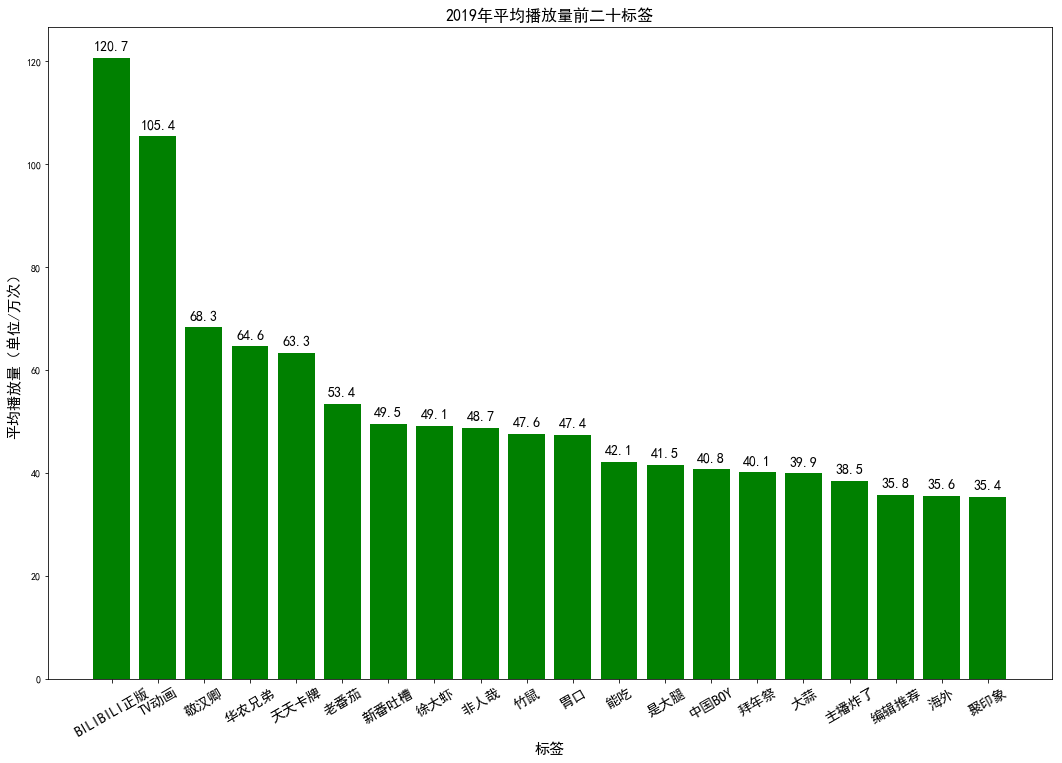

In [28]:
# 前一百标签平均播放量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tags.txt', 'rb') as f:
    tags = pickle.load(f)
with open(r'C:\Users\yc\Desktop\counts.txt', 'rb') as f:
    counts = pickle.load(f)
tag_means = {}
for tag in tags:
    if counts[tag]>=100:
        tag_means[tag] = tags[tag]/counts[tag]
tag_means2 = sorted(tag_means.items(), key=lambda item:item[1], reverse=True) # 标签平均播放量   
x,y2 = [],[]
for tag in tag_means2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 数量, 保留一位小数

y = [round(y3/10000,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30, fontsize=14)
plt.xlabel("标签", fontsize=15)
plt.ylabel("平均播放量（单位/万次）", fontsize=15)
plt.title("2019年平均播放量前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=14)
plt.savefig(r'C:\Users\yc\Desktop\1_tag_mean.png', dpi=300) #指定分辨率保存
plt.show()

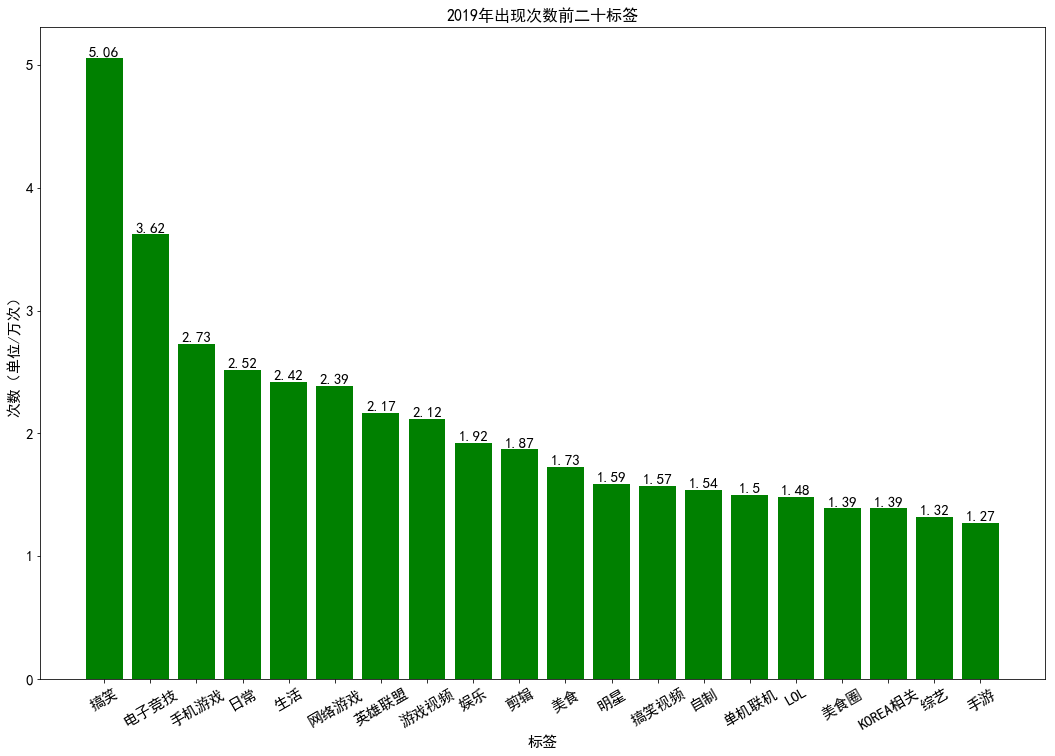

In [2]:
# 前一百标签出现次数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\counts.txt', 'rb') as f:
    tag_means = pickle.load(f)
tag_means2 = sorted(tag_means.items(), key=lambda item:item[1], reverse=True) # 标签出现次数  
x,y2 = [],[]
for tag in tag_means2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 出现次数
    
y = [round(y3/10000,2) for y3 in y2]
    
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("次数（单位/万次）",fontsize=15)
plt.title("2019年出现次数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom",fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1_tag_counts.png', dpi=300) #指定分辨率保存
plt.show()

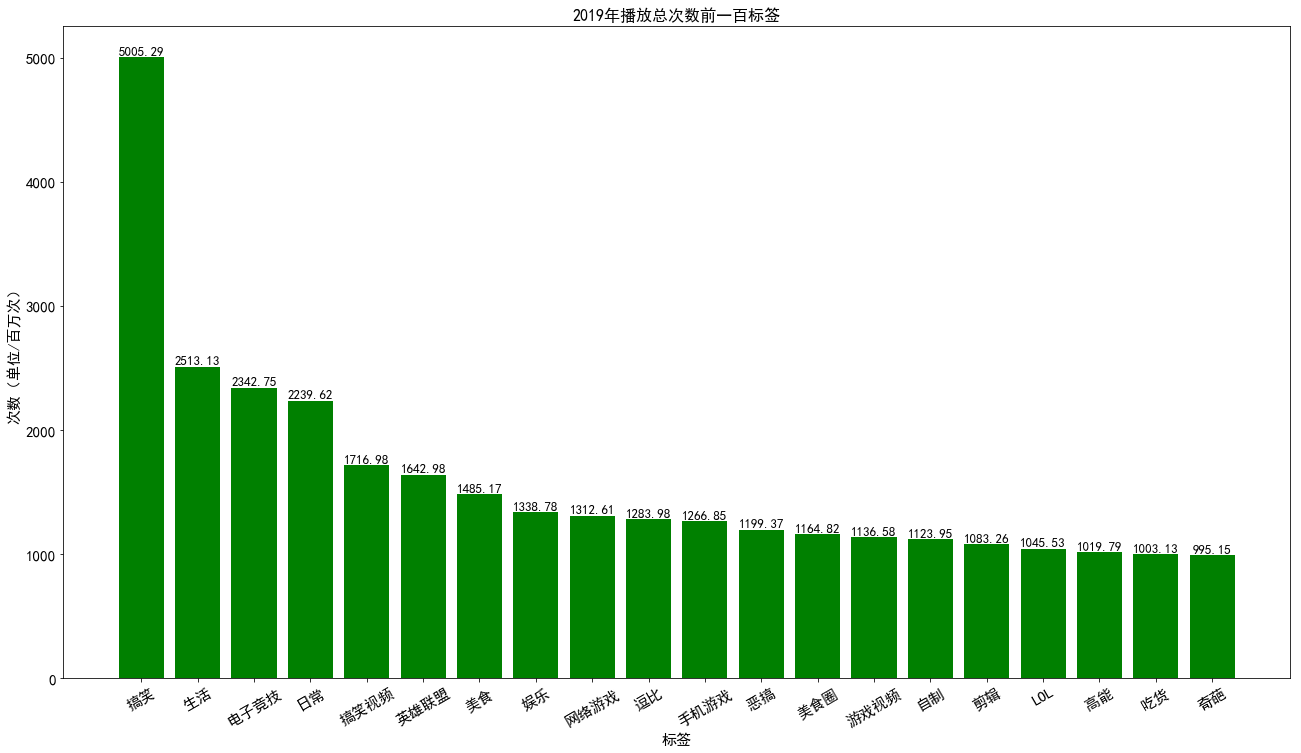

In [8]:
# 前一百标签播放总次数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tags.txt', 'rb') as f:
    tag_means = pickle.load(f)
tag_means2 = sorted(tag_means.items(), key=lambda item:item[1], reverse=True) # 标签相应播放总次数  
x,y2 = [],[]
for tag in tag_means2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 播放总次数

y = [round(y3/1000000,2) for y3 in y2]

rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15) # rotation 旋转 90 度
plt.yticks(fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("次数（单位/百万次）",fontsize=15)
plt.title("2019年播放总次数前一百标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=13)
plt.savefig(r'C:\Users\yc\Desktop\1_tags_play.png', dpi=300) #指定分辨率保存
plt.show()

In [ ]:
# 播放量10万以上--生成标签数据数据-----------------------------------------10w---------------------------------------
import time
import pymongo
import random
import pickle
def get_ready(ch='video_info',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready() # 连接 mongodb
ss = mycol.find({})

tags,counts = {},{}
for i,j in enumerate(ss):
    for t in j['tag'].split(','): #遍历tags
        if '.' in t:
            t = t.replace('.','-')
        elif '$' in t:
            t = t.replace('$','631')
        if t in tags:
            if j['play'] != '--': # 异常情况这一个：'title': '如果把24K金的iPhone 6放进废旧手机回收机里 能换到多少钱？'
                tags[t] += int(j['play'])
                counts[t] += 1
        else:
            if j['play'] != '--':
                tags[t] = int(j['play'])
                counts[t] = 1

with open(r'C:\Users\yc\Desktop\10_tag_play.txt', 'wb') as f:
    pickle.dump(tags, f)
# with open(r'C:\Users\yc\Desktop\tag_counts.txt', 'wb') as f:
#     pickle.dump(counts, f)

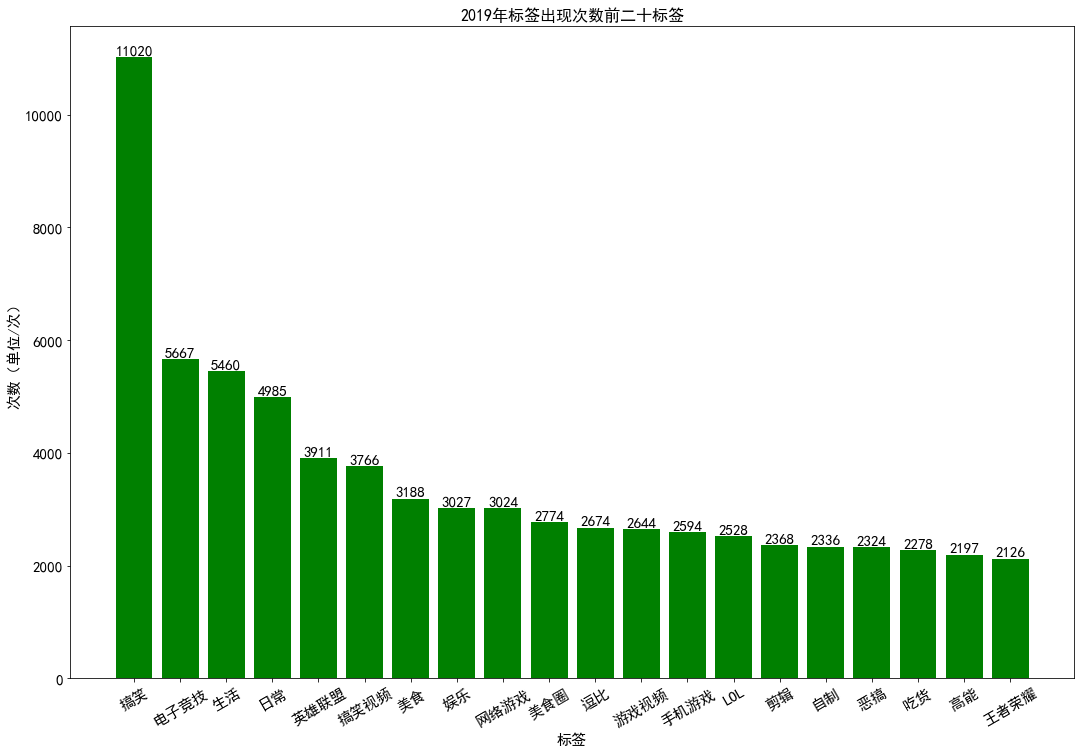

In [36]:
# 10万以上播放量---前一百标签出现次数量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸

# 数据

with open(r'C:\Users\yc\Desktop\tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)

r_mean2 = sorted(tag_counts.items(), key=lambda item:item[1], reverse=True) # 标签平均评论量排序 
    
x,y = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y.append(round(tag[1],1)) # 标签平均评论数量, 保留一位小数

rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("次数（单位/次）",fontsize=15)
plt.title("2019年标签出现次数前二十标签",fontsize=16)

# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_counts.png', dpi=300) #指定分辨率保存
plt.show()

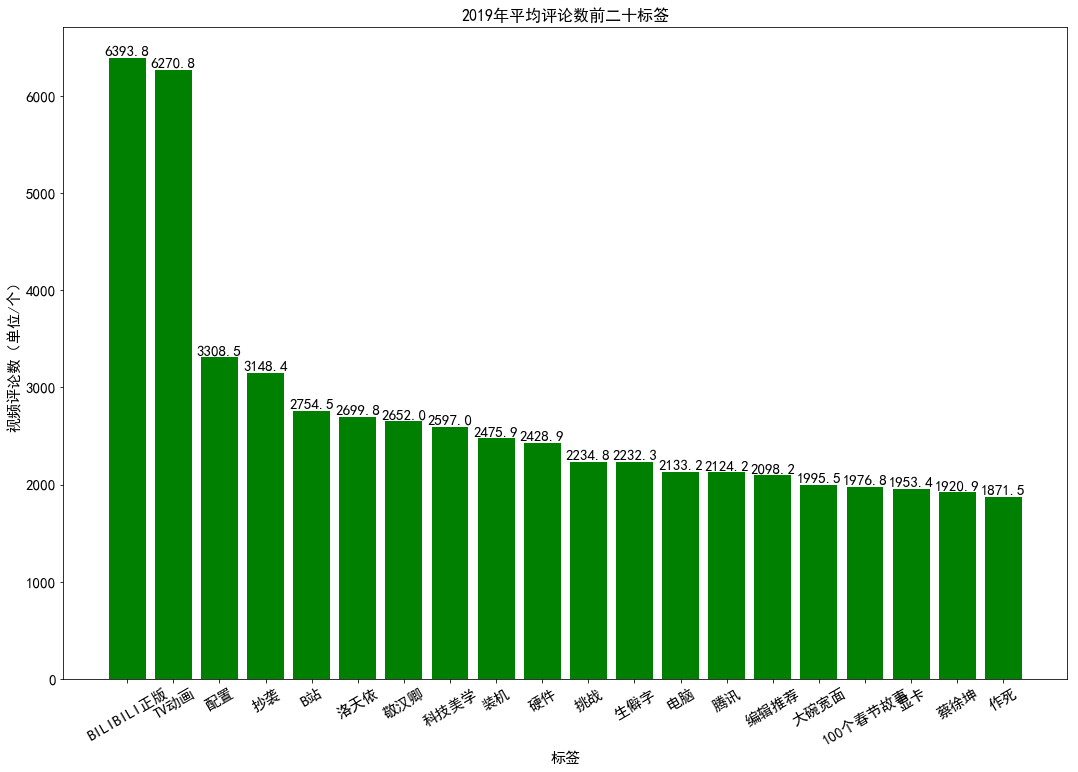

In [42]:
# 前一百标签平均评论量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_review.txt', 'rb') as f:
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for review in tag_review:
    if tag_counts[review] >= 100: #----增加次数限制----
        r_mean[review] = tag_review[review]/tag_counts[review] # 生成平均评论数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签平均评论量排序 
    
x,y = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y.append(round(tag[1],1)) # 标签平均评论数量, 保留一位小数

rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("视频评论数（单位/个）",fontsize=15)
plt.title("2019年平均评论数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_r_mean.png', dpi=300) #指定分辨率保存
plt.show()

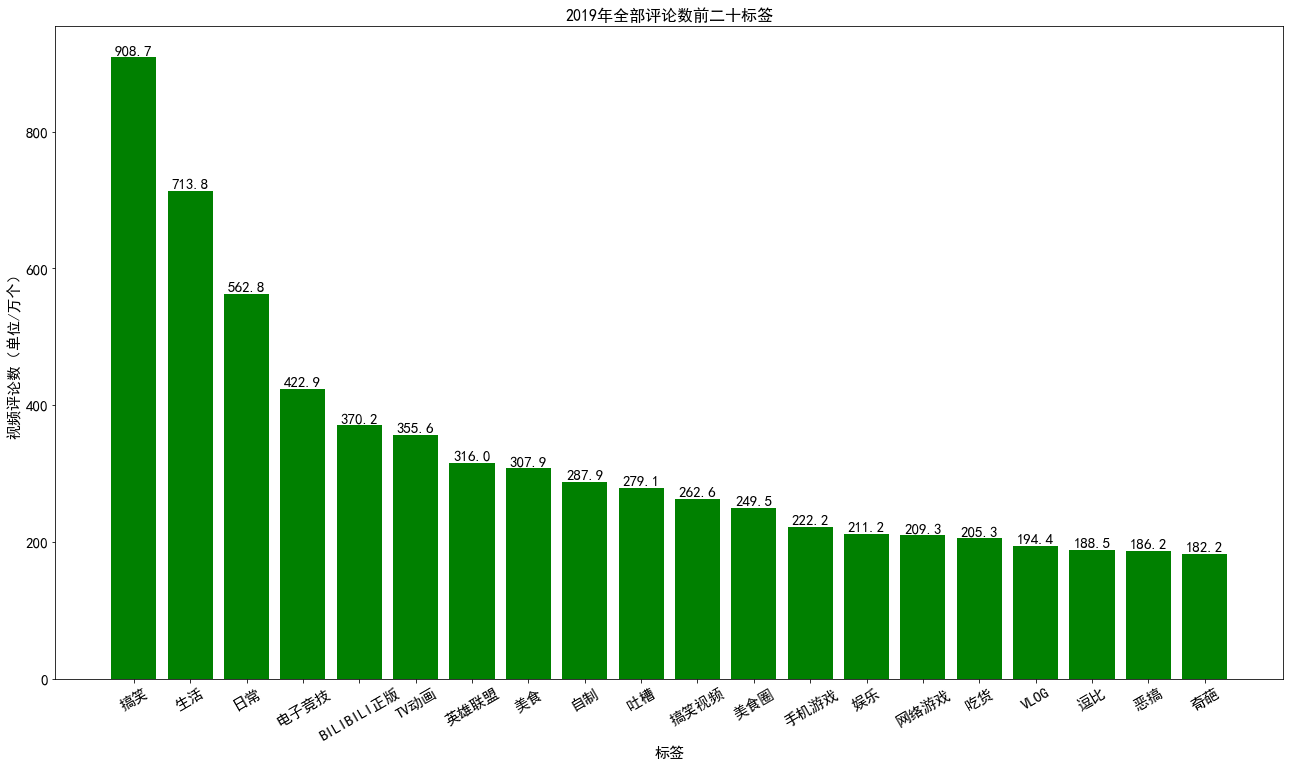

In [9]:
# 前一百标签全部评论量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_review.txt', 'rb') as f:
    tag_review = pickle.load(f)

r_mean = {}
for review in tag_review:
    r_mean[review] = tag_review[review] # 生成全部评论数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签全部评论量排序 
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 标签全部评论数量, 保留一位小数
y = [round(y3/10000,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签", fontsize=15)
plt.ylabel("视频评论数（单位/万个）", fontsize=15)
plt.title("2019年全部评论数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_r_all.png', dpi=300) #指定分辨率保存
plt.show()

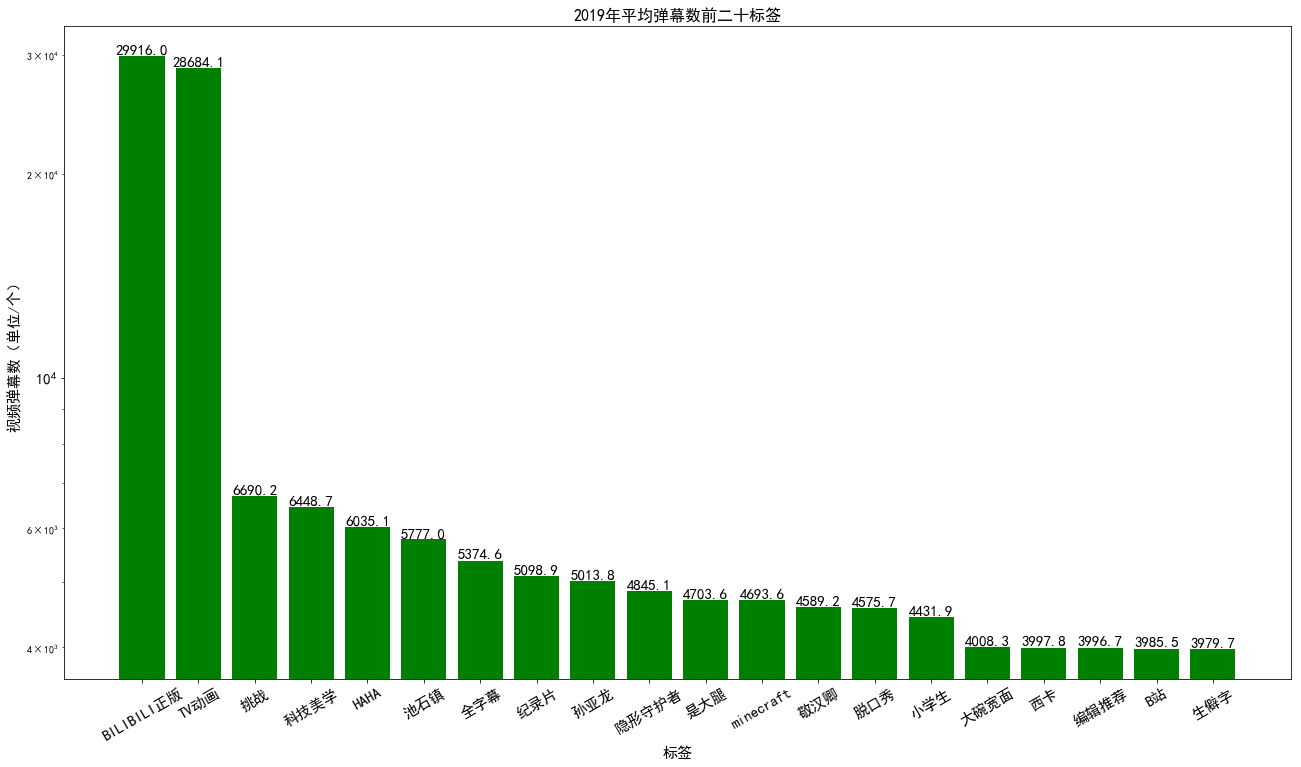

In [14]:
# 前一百标签平均弹幕量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_vr.txt', 'rb') as f:
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for review in tag_review:
    if tag_counts[review] >= 100: #----增加次数限制----
        r_mean[review] = tag_review[review]/tag_counts[review] # 生成平均弹幕数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签平均评论量排序 
    
x,y = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y.append(round(tag[1],1)) # 标签平均弹幕数量, 保留一位小数

rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.yscale('log')
plt.xticks(range(len(x)), x, rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签", fontsize=15)
plt.ylabel("视频弹幕数（单位/个）", fontsize=15)
plt.title("2019年平均弹幕数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_vr_mean.png', dpi=300) #指定分辨率保存
plt.show()

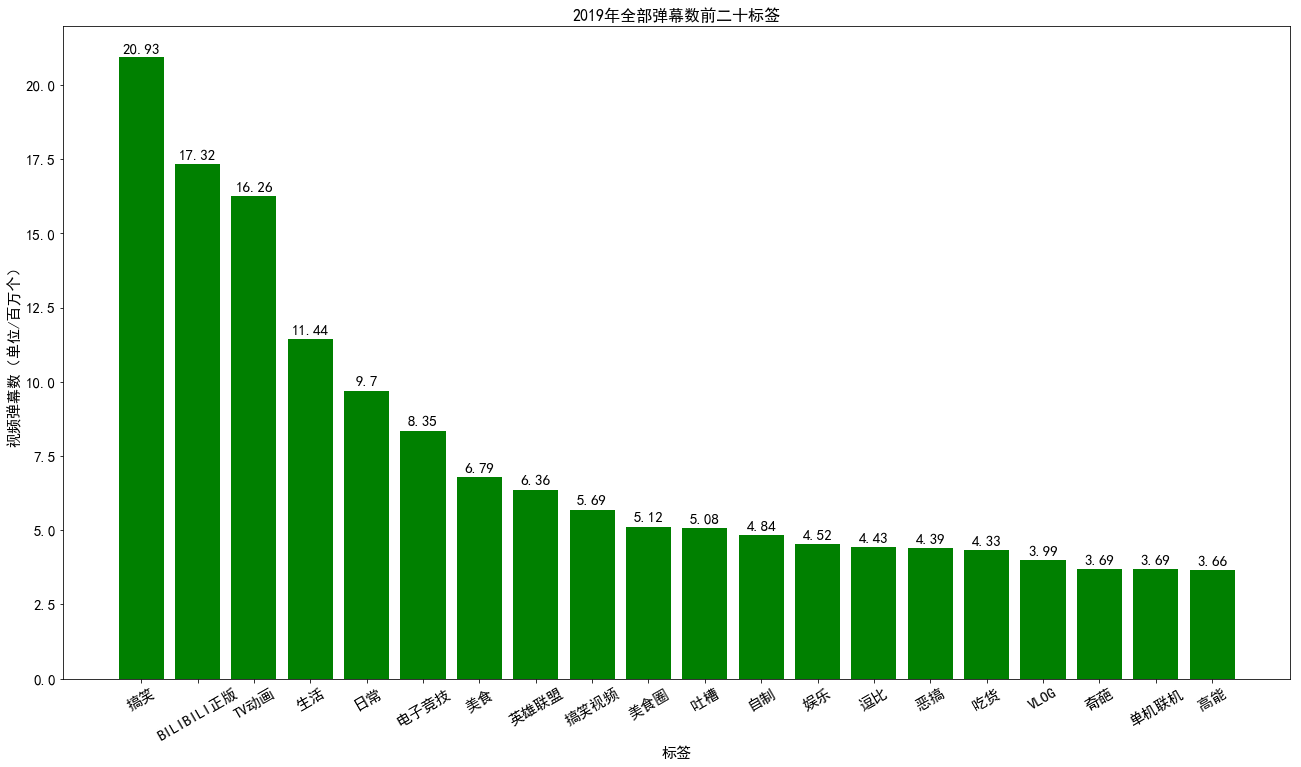

In [16]:
# 前一百标签全部弹幕量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_vr.txt', 'rb') as f:
    tag_review = pickle.load(f)
r_mean = {}
for review in tag_review:
    r_mean[review] = tag_review[review] # 生成全部弹幕数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签全部评论量排序 
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 标签全部弹幕数量, 保留一位小数
y = [round(y3/1000000,2) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签", fontsize=15)
plt.ylabel("视频弹幕数（单位/百万个）", fontsize=15)
plt.title("2019年全部弹幕数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+0.1, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_vr_all.png', dpi=300) #指定分辨率保存
plt.show()

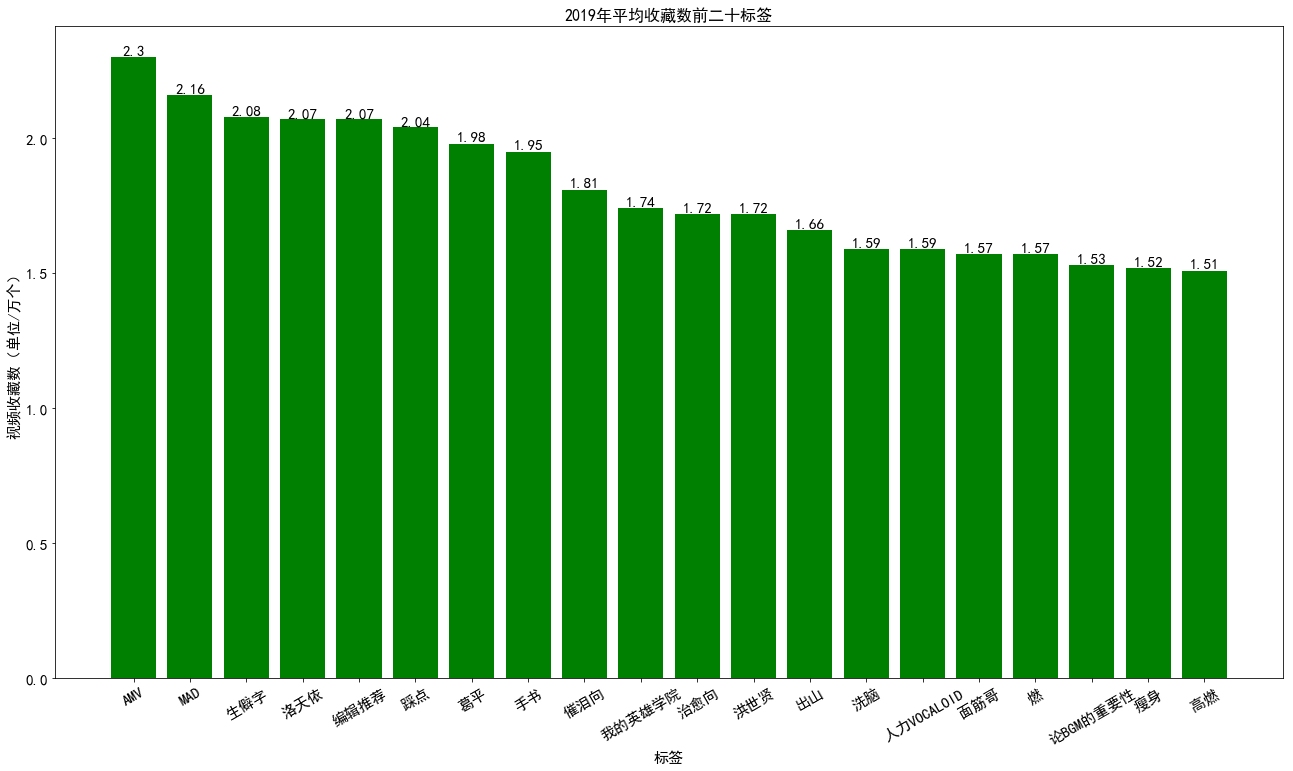

In [22]:
# 前一百标签平均收藏量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_favorites.txt', 'rb') as f: # 修改读取文件名即可
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for review in tag_review:
    if tag_counts[review] >= 100:
        r_mean[review] = tag_review[review]/tag_counts[review] # 生成平均收藏数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签平均收藏量排序 
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 标签平均收藏数量, 保留一位小数
y = [round(y3/10000,2) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签", fontsize=15)
plt.ylabel("视频收藏数（单位/万个）", fontsize=15)
plt.title("2019年平均收藏数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_fa_mean.png', dpi=300) #指定分辨率保存
plt.show()

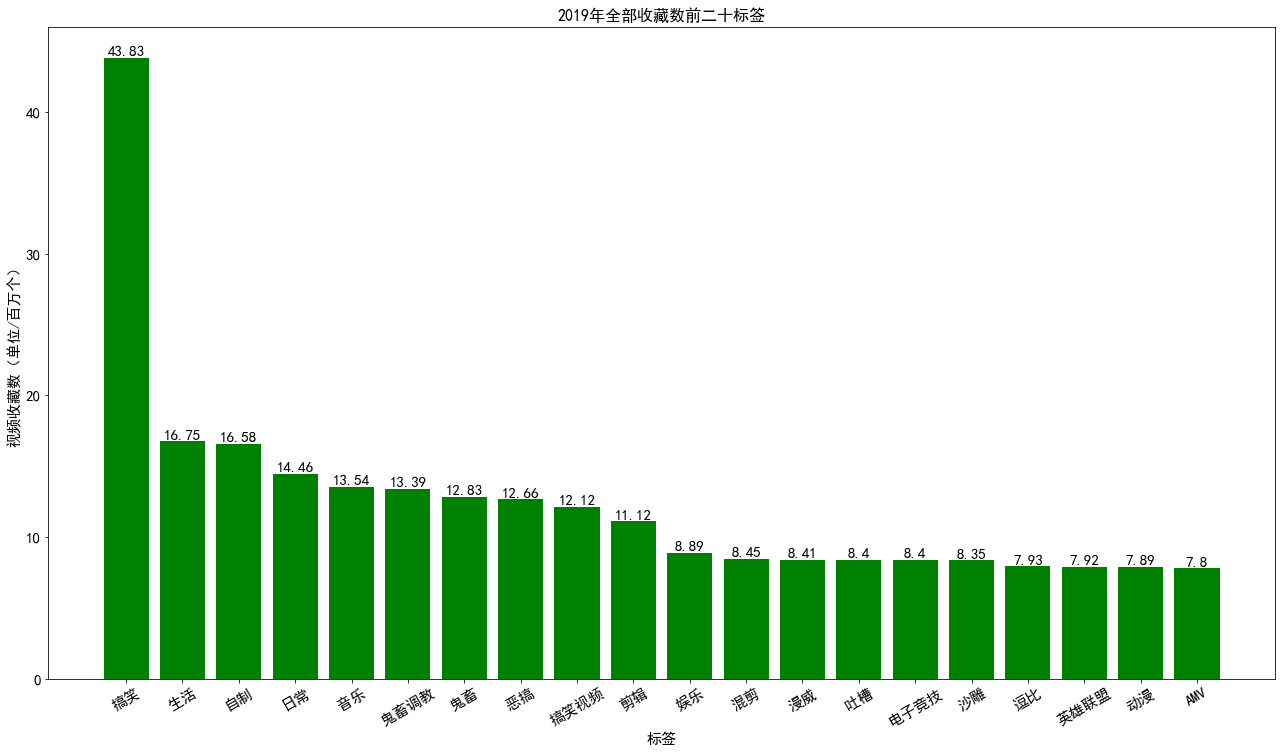

In [25]:
# 前一百标签全部收藏量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_favorites.txt', 'rb') as f: # 修改读取文件名即可
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for review in tag_review:
    r_mean[review] = tag_review[review] # /tag_counts[review] # 生成全部收藏数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签全部收藏量排序 
    
x,y2= [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 标签平均收藏数量, 保留一位小数
y = [round(y3/1000000,2) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签", fontsize=15)
plt.ylabel("视频收藏数（单位/百万个）",fontsize=15)
plt.title("2019年全部收藏数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_fa_all.png', dpi=300) #指定分辨率保存
plt.show()

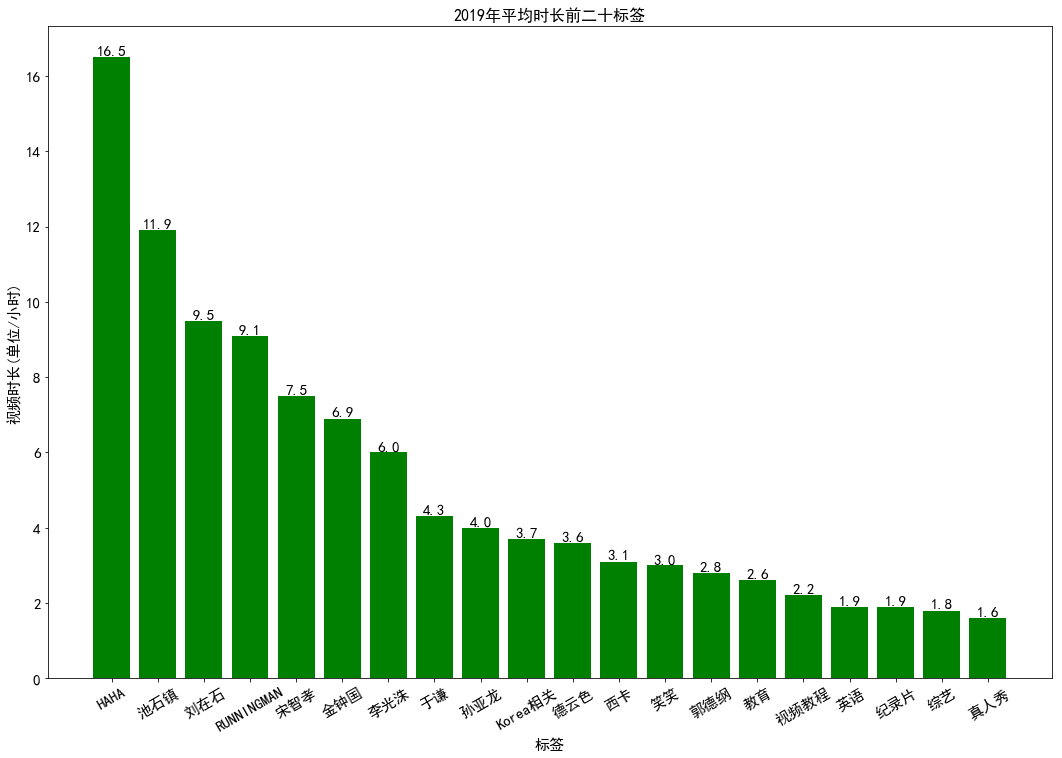

In [67]:
# 前一百标签平均时长量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_duration.txt', 'rb') as f: # 修改读取文件名即可
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for i,review in enumerate(tag_review):
    if tag_counts[review]>=100:
        r_mean[review] = tag_review[review]/tag_counts[review] # 生成平均时长数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签平均时长量排序 ， 降序
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 标签平均时长数量, 保留一位小数

y = [round(y3/3600,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("视频时长(单位/小时)",fontsize=15)
plt.title("2019年平均时长前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_dura_mean.png', dpi=300) #指定分辨率保存
plt.show()

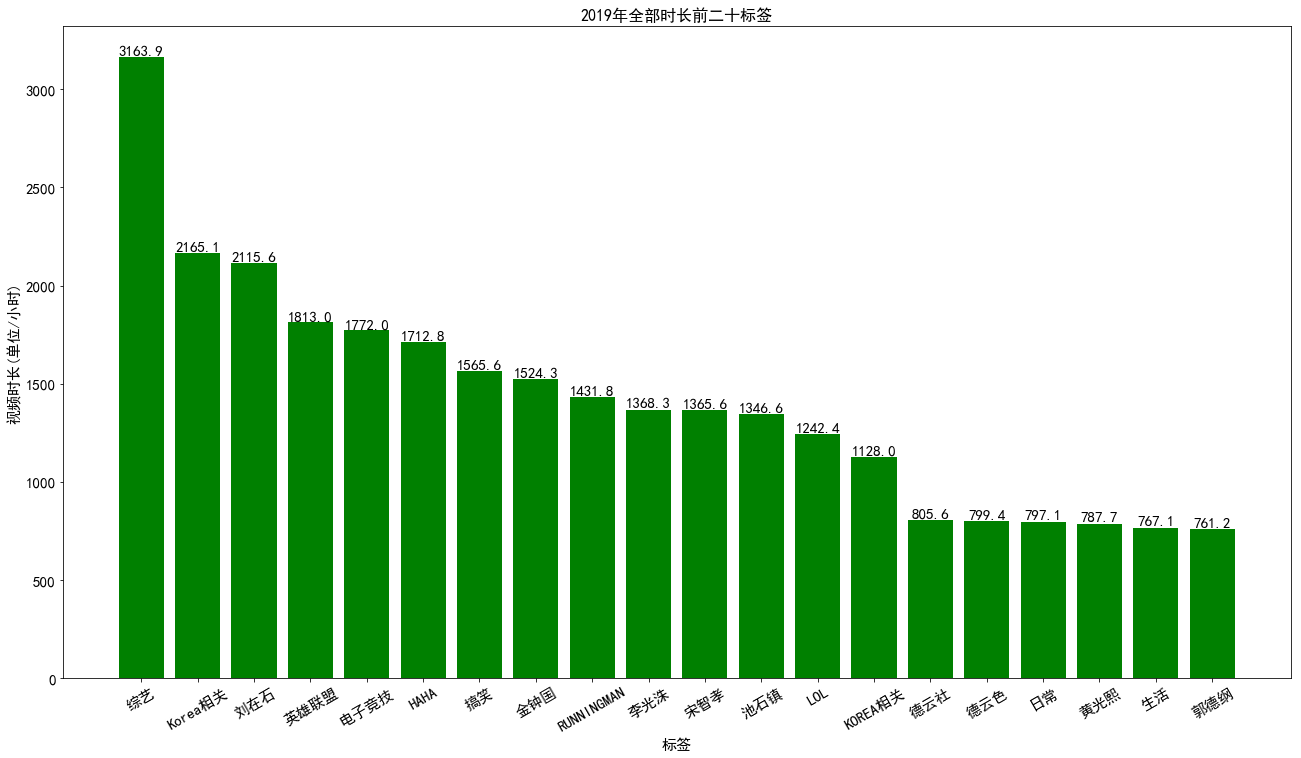

In [32]:
# 前一百标签全部时长量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_duration.txt', 'rb') as f: # 修改读取文件名即可
    tag_review = pickle.load(f)
r_mean = {}
for review in tag_review:
    r_mean[review] = tag_review[review] # 生成全部时长数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签全部时长量排序 ， 降序
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 标签全部时长数量, 保留一位小数

y = [round(y3/3600,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("视频时长(单位/小时)",fontsize=15)
plt.title("2019年全部时长前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\10_dura_all.png', dpi=300) #指定分辨率保存
plt.show()

56840 1337 1337
('陈翔六点半', 116593.18333333333) 116593.18333333333 421.73333333333335
('狗贼的日常', 133116.7068965517) 133116.7068965517 1768.344827586207
('栋笃笑', 134970.0650406504) 134970.0650406504 1258.121951219512
('郭嘉峰', 135075.2) 135075.2 1272.1166666666666
1336


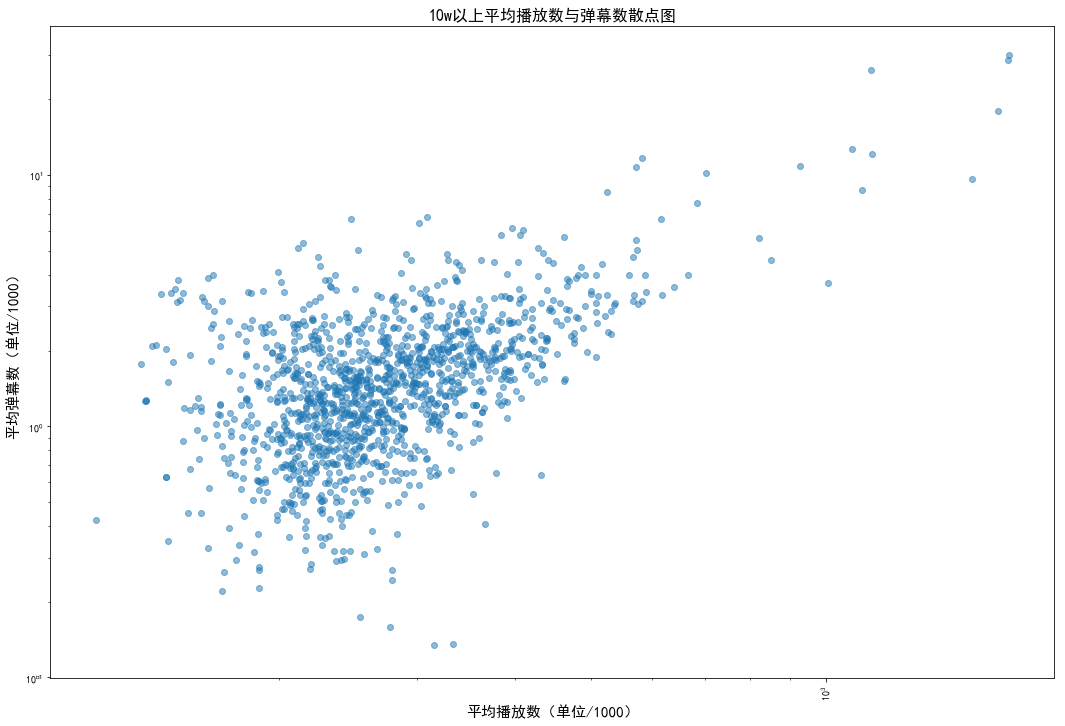

In [150]:
# 平均播放与平均弹幕散点图 10w以上
# 前一百标签全部收藏量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\tag_vr.txt', 'rb') as f: # 弹幕
    tag_vr = pickle.load(f)
with open(r'C:\Users\yc\Desktop\10_tag_play.txt', 'rb') as f: # 播放数 ---------改为评论数
    tag_play = pickle.load(f)
with open(r'C:\Users\yc\Desktop\tag_counts.txt', 'rb') as f: # 标签出现次数
    tag_counts = pickle.load(f)
vr_mean = {}
play_mean = {}
for i,tag in enumerate(tag_vr):
    if tag_counts[tag]>50: # 次数
        vr_mean[tag] = tag_vr[tag]/tag_counts[tag] # 生成平均弹幕数字典
        play_mean[tag] = int(tag_play[tag])/tag_counts[tag] # 生成平均播放数字典
# for index,vi in enumerate(vr_mean):
#     if index<=5:
#         print(vr_mean[vi],play_mean[vi])
play_mean2 = sorted(play_mean.items(), key=lambda item:item[1], reverse=False) # 标签平均播放数排序 
print(i,len(vr_mean),len(play_mean))
x,y = [],[]
for index,tag2 in enumerate(play_mean2[:]):
    if index<=3:
        print(tag2,play_mean[tag2[0]],vr_mean[tag2[0]])
    x.append(play_mean[tag2[0]]/1000)
    y.append(vr_mean[tag2[0]]/1000)
print(index)
plt.scatter(x, y, alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("平均播放数（单位/1000）",fontsize=15)
plt.ylabel("平均弹幕数（单位/1000）",fontsize=15)
plt.title("10w以上平均播放数与弹幕数散点图",fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.savefig(r'C:\Users\yc\Desktop\10_vr_play.png', dpi=300) #指定分辨率保存
plt.show()

In [ ]:
# 视频播放数超50w视频作者播放数相关信息------------------------up主-----------------------------------
import pymongo
import pickle

def get_ready(ch='author',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready() # 连接 mongodb
authors = mycol.find({})
plays = {}
for i,author in enumerate(authors):
    plays[author['name']] = author['follower']
with open(r'C:\Users\yc\Desktop\author_fllower.txt', 'wb') as f: # 修改读取文件名即可
    pickle.dump(plays, f)

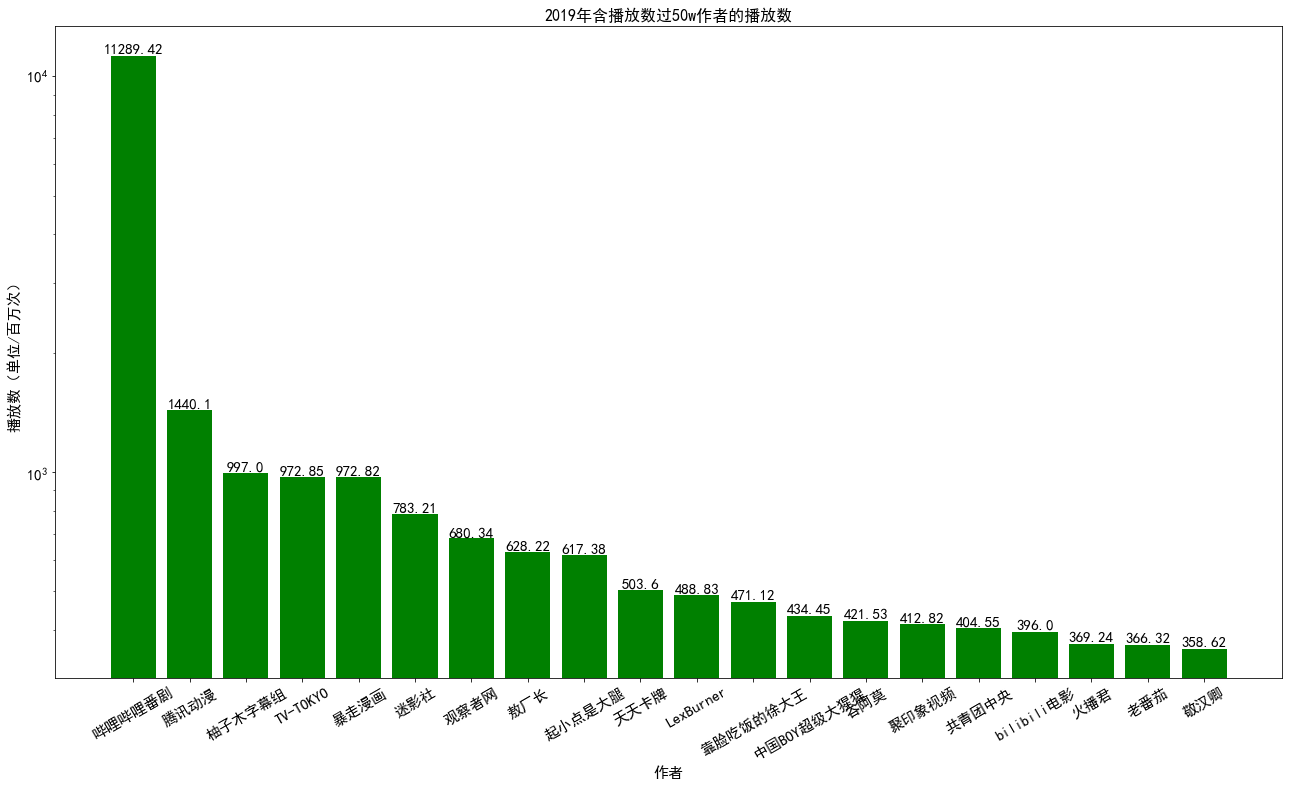

In [35]:
# 作者总播放数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

with open(r'C:\Users\yc\Desktop\author_play.txt', 'rb') as f: # 修改读取文件名即可
    a_play = pickle.load(f)
r_mean2 = sorted(a_play.items(), key=lambda item:item[1], reverse=True) # 作者播放数量排序 ， 降序
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 作者名
    y2.append(round(tag[1],1)) # 作者播放数量, 保留一位小数
y = [round(y3/1000000,2) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("作者", fontsize=15)
plt.ylabel("播放数（单位/百万次）",fontsize=15)
plt.title("2019年含播放数过50w作者的播放数",fontsize=16)
plt.yscale('log')
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\50_a_play.png', dpi=300) #指定分辨率保存
plt.show()

3756


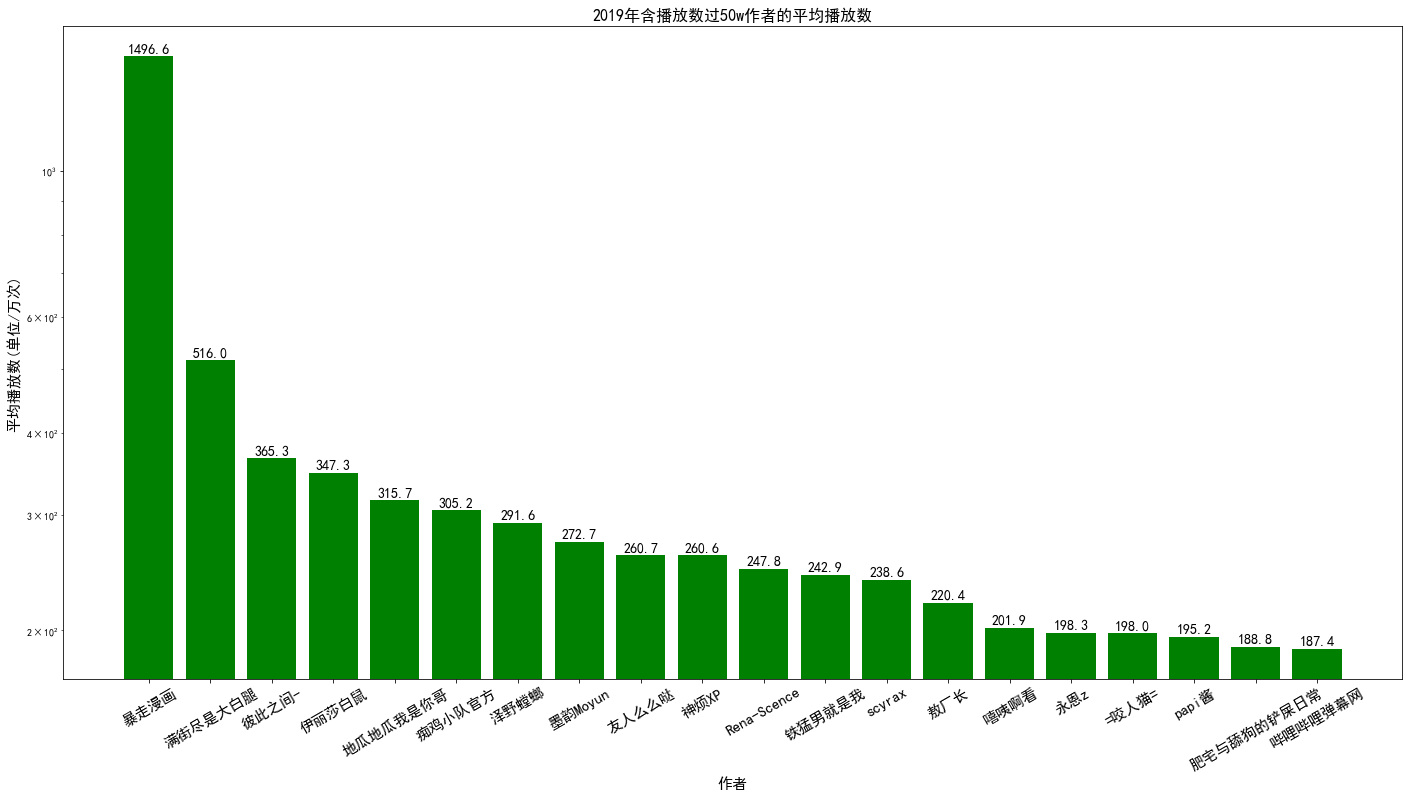

In [38]:
# 作者平均播放数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import pymongo

def get_ready(ch='author_counts_video',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready()

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (24.0, 12.0) # 设置figure_size尺寸

with open(r'C:\Users\yc\Desktop\author_play.txt', 'rb') as f: # 修改读取文件名即可
    a_play = pickle.load(f)
avcounts = mycol.find({})
videoc = {}
for count in avcounts:
    videoc = dict(videoc, **count) # 作者播放数列表
print(len(videoc))
a_play_mean = {}
for i,j in enumerate(a_play):
#     if i < 3:
#         print(j,a_play[j],videoc[j])
    if '.' in j:
        k = j.replace('.','-')
        a_play_mean[k] = a_play[j]/videoc[k]
    elif videoc[j] != 0:
        a_play_mean[j] = a_play[j]/videoc[j]  # 作者平均播放数
    
r_mean2 = sorted(a_play_mean.items(), key=lambda item:item[1], reverse=True) # 作者播放数量排序 ， 降序
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 作者名
    y2.append(round(tag[1],1)) # 作者播放数量, 保留一位小数

y = [round(y3/10000,1) for y3 in y2]    
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.xlabel("作者",fontsize=15)
plt.ylabel("平均播放数(单位/万次)",fontsize=15)
plt.title("2019年含播放数过50w作者的平均播放数",fontsize=16)
plt.yscale('log')
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=14)
plt.savefig(r'C:\Users\yc\Desktop\50_a_play_mean.png', dpi=300) #指定分辨率保存
plt.show()   

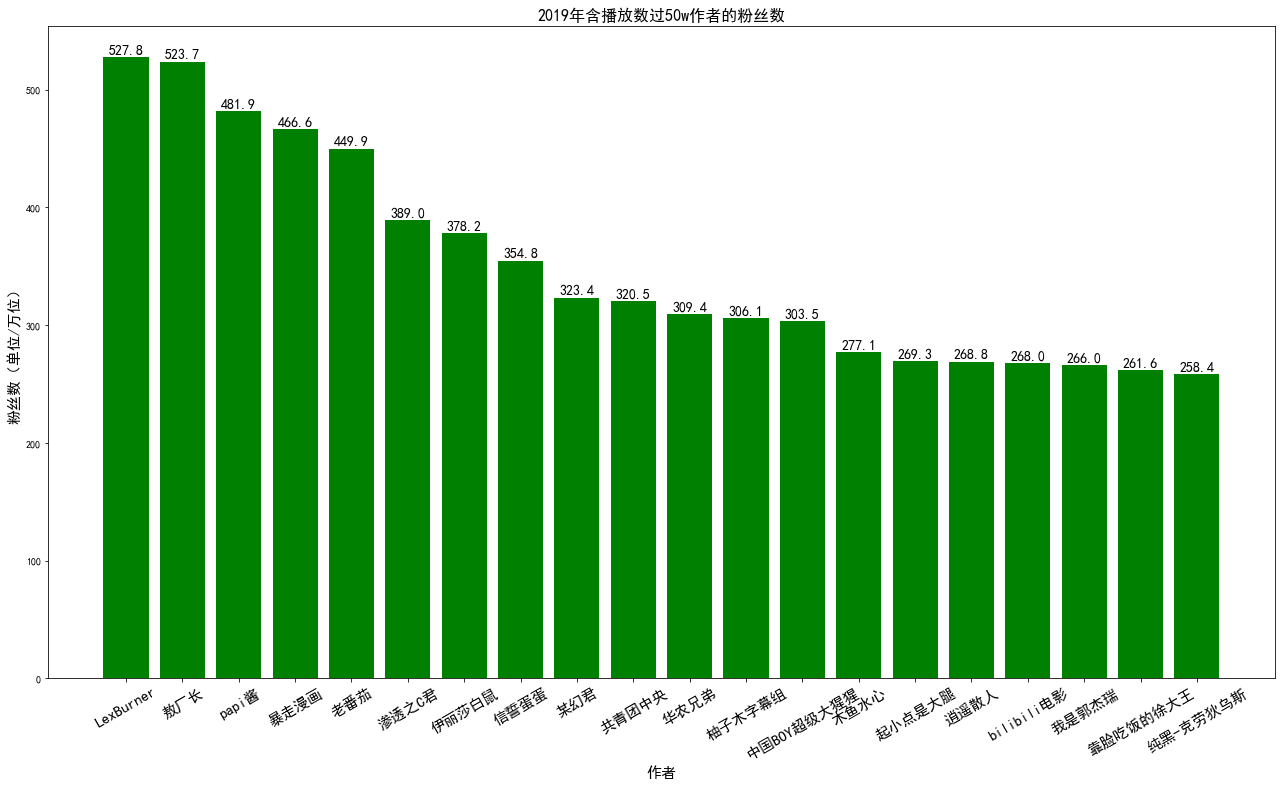

In [40]:
# 作者粉丝数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

with open(r'C:\Users\yc\Desktop\author_fllower.txt', 'rb') as f: # 修改读取文件名即可
    a_play = pickle.load(f)
r_mean2 = sorted(a_play.items(), key=lambda item:item[1], reverse=True) # 作者粉丝数量排序 ， 降序
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 作者名
    y2.append(round(tag[1],1)) # 作者粉丝数量, 保留一位小数
y = [round(y3/10000,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.xlabel("作者",fontsize=15)
plt.ylabel("粉丝数（单位/万位）",fontsize=15)
plt.title("2019年含播放数过50w作者的粉丝数",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=14)
plt.savefig(r'C:\Users\yc\Desktop\50_a_follower.png', dpi=300) #指定分辨率保存
plt.show()

虾姬儿剪 0 703958 520
这才是真正的摄影 0 1309904 924
总数： 3754 3752


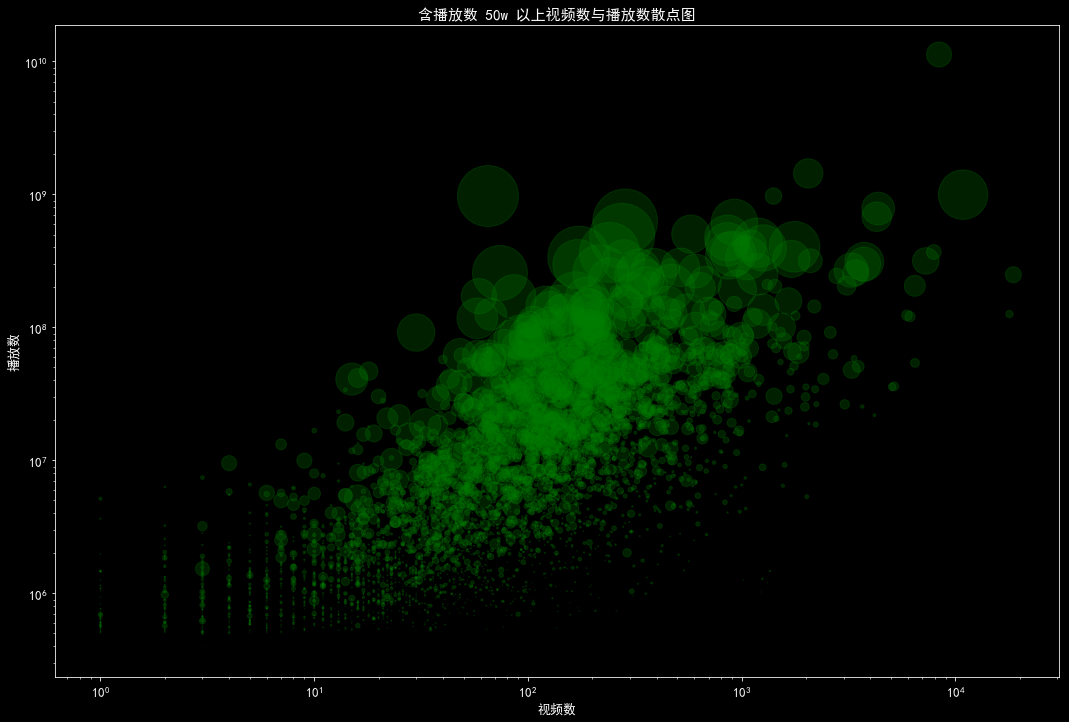

In [75]:
# 作者视频数与播放总数散点图 --------------------------------作者------------------------------------------------
import time
import pymongo
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸
plt.style.use('dark_background')
def get_ready(ch='author',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient, mycount
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
    mycount = mydb['author_counts_video']
get_ready() # 连接 mongodb
plays = mycol.find({}) # 播放数
counts = mycount.find({})

x,y,z =[],[],[]
names_p,names_c,names_f= {},{},{}
for count in counts:
    count.pop('_id') # 删除 key
    names_c = dict(names_c, **count) # 视频数
for play in plays:
    if '.' in play['name']: # 更换 '.'
        play['name'] = play['name'].replace('.','-')
    names_p[play['name']] = play['archive']['view'] # 粉丝数
    names_f[play['name']] = play['follower'] # 播放数
# print(names_c)
# print(names_p)

i2 = 0
for i,name in enumerate(names_p):
    if names_c[name] <= 0:
        print(name, names_c[name],names_p[name],names_f[name])
        i2+=1
        continue
    x.append(names_c[name])
    y.append(names_p[name])
    z.append(names_f[name]/100000)

print('总数：',i,i-i2)
s = [20*4*n for n in z]    
plt.scatter(x, y, s=s, color='green', alpha=0.25)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("视频数",fontsize=13)
plt.ylabel("播放数",fontsize=13)
plt.title("含播放数 50w 以上视频数与播放数散点图",fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.savefig(r'C:\Users\yc\Desktop\author_c_play.png', dpi=300) #指定分辨率保存
plt.show()

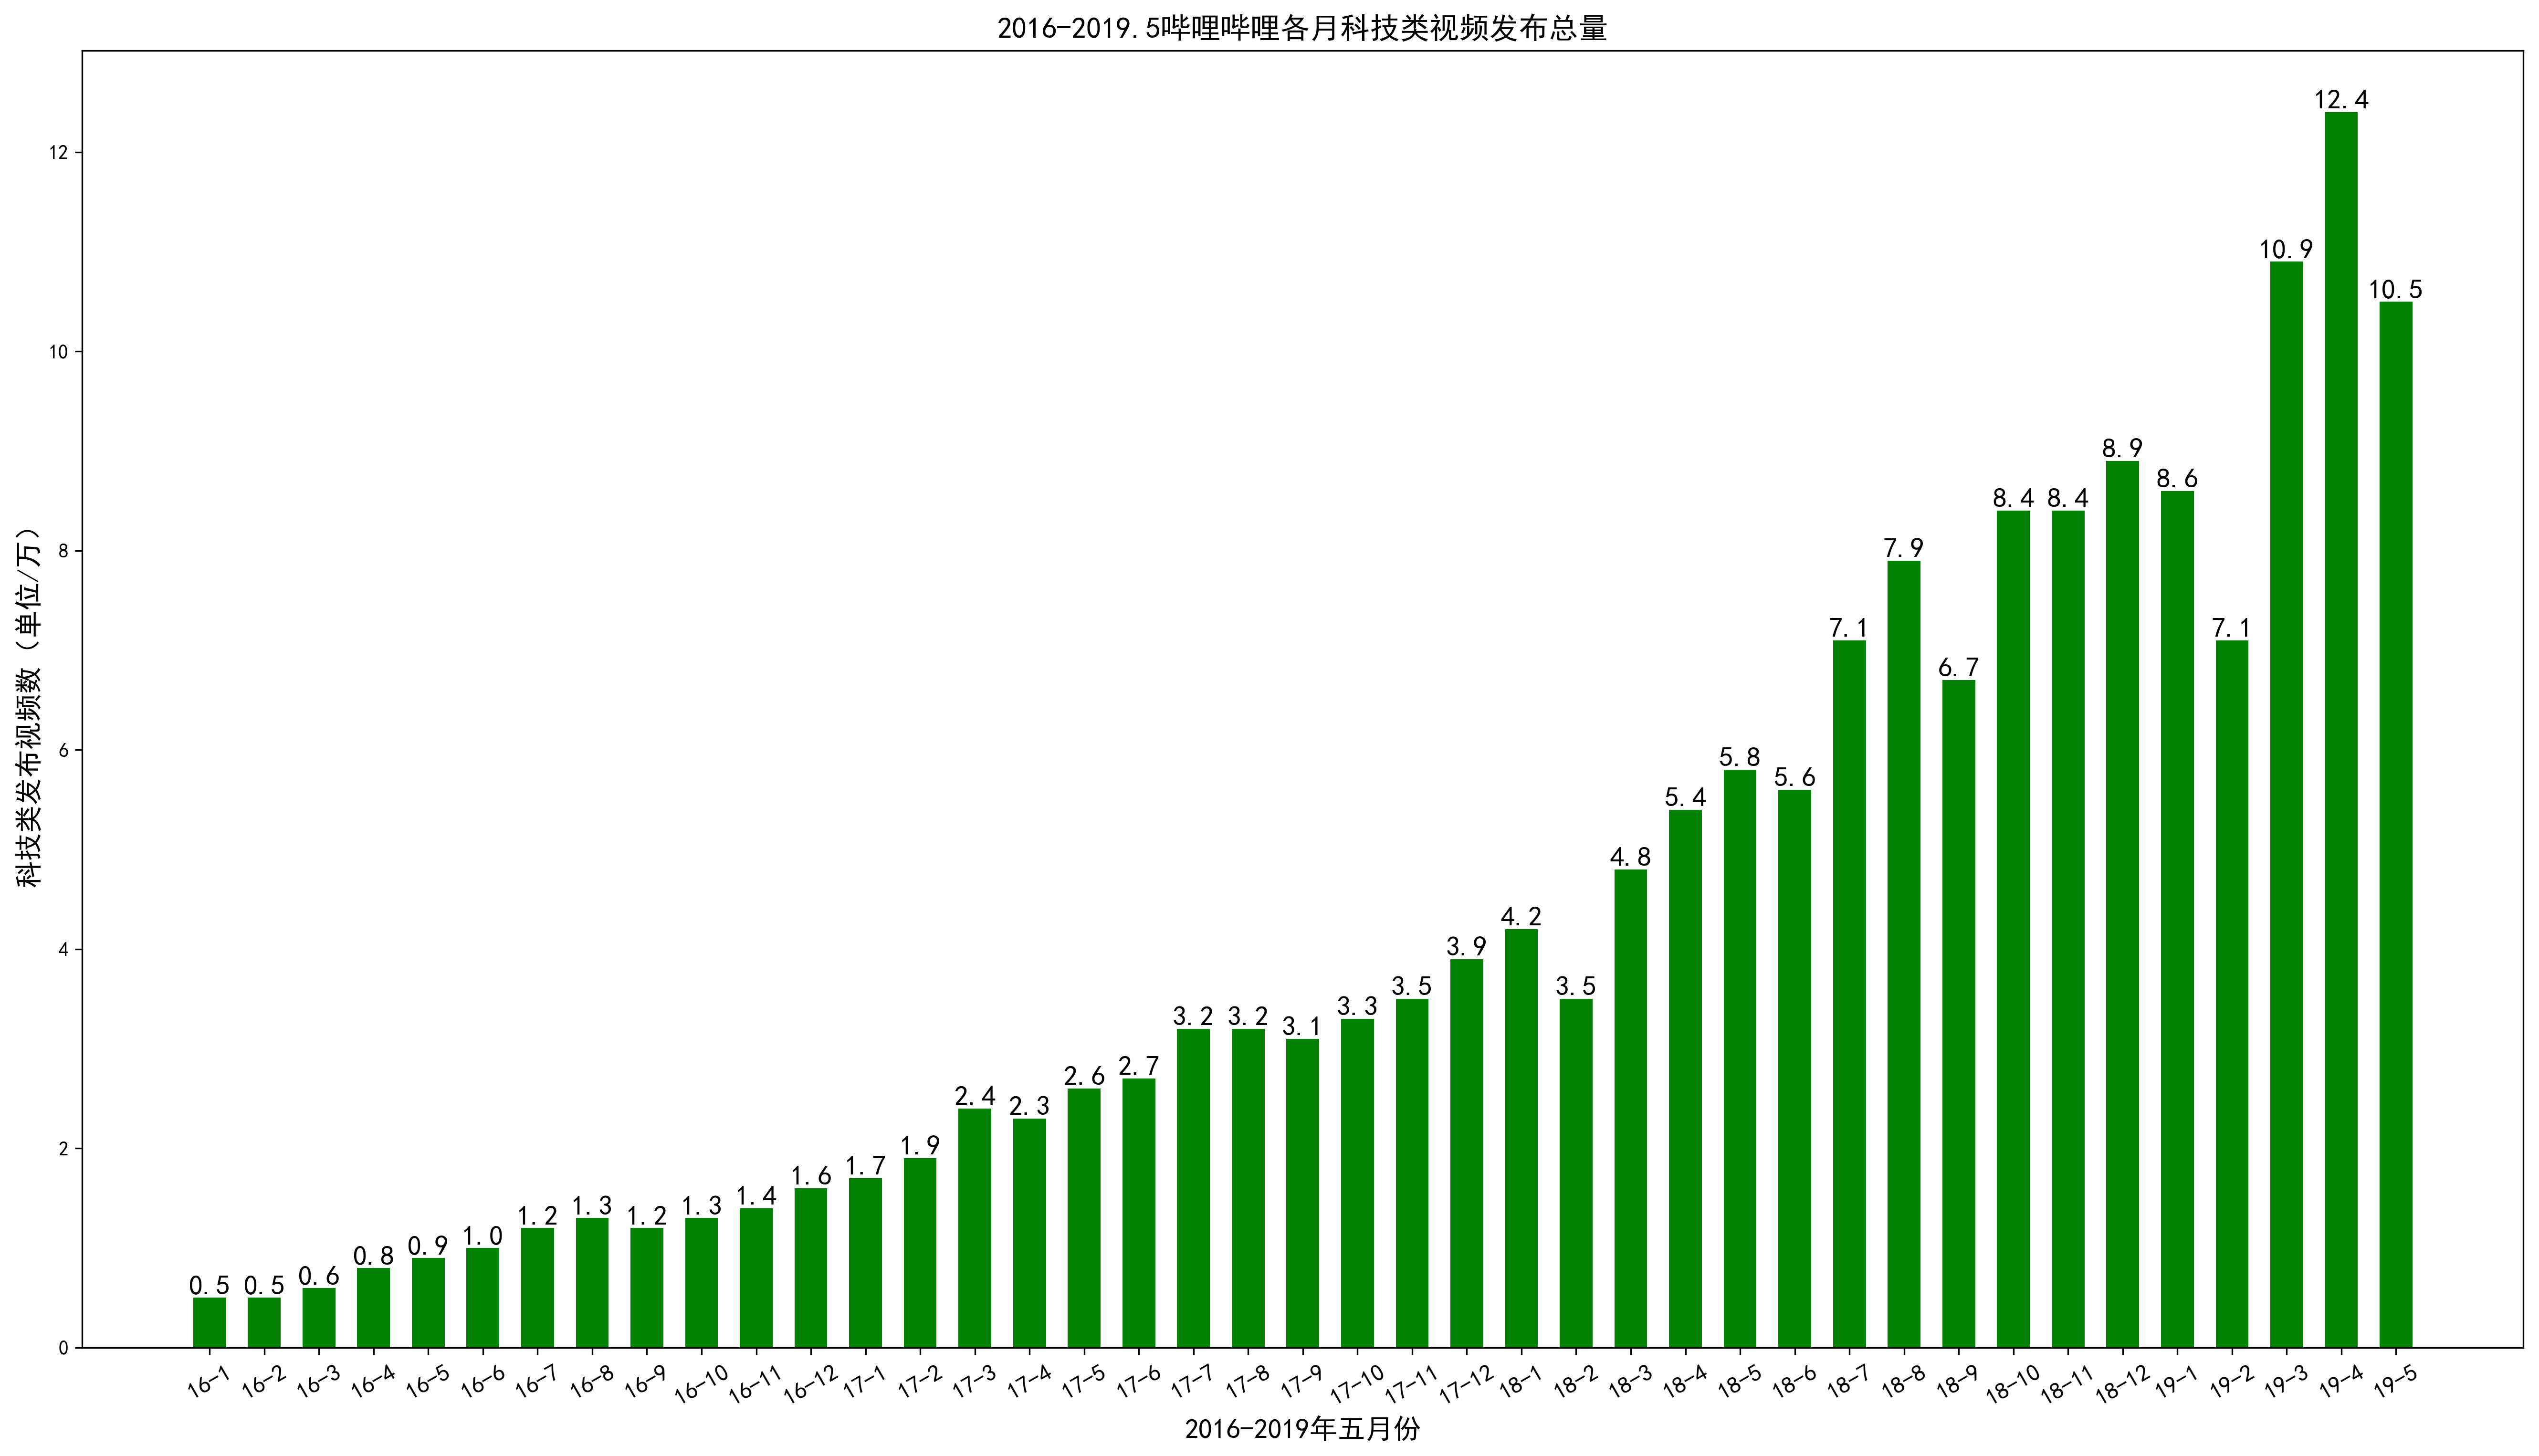

In [42]:
#  2019年六月前科技类播放数1w以上视频数据分析--------------------------------科技类----------------------------------------
# 总发布量变化
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸
plt.rcParams['figure.dpi'] = 300 #分辨率
plt.rcParams['savefig.dpi'] = 300 #图片像素

# 图像设置 五月数据需要修改一下
data2 =[4906 , 5103 , 6363 , 7621 , 8816 ,9546 , 12238 , 13458 , 11559 , 13323 ,14166 , 16153 , 17461 , 19261 , 24238 ,23466 , 26438 , 27209 , 31888 , 31577 ,30859 , 32639 , 34999 , 38651 , 41973 ,35295 , 47681 , 53990 , 57984 , 56214 ,71241 , 78512 , 66730 , 83795 , 83504 ,88680 , 86352 , 71130 , 109350 , 123742 , 105350] # 2018-2019每月b站视频发布总数
data = [round(da/10000,1) for da in data2]
rects = plt.bar(range(len(data)), data, width=0.6, fc='g') # 条形图

plt.xticks(range(len(data)), ['16-1', '16-2', '16-3', '16-4', '16-5', '16-6', '16-7', '16-8', '16-9', '16-10', '16-11', '16-12','17-1', '17-2', '17-3', '17-4', '17-5', '17-6', '17-7', '17-8', '17-9', '17-10', '17-11', '17-12','18-1','18-2','18-3','18-4','18-5','18-6','18-7','18-8','18-9','18-10','18-11','18-12','19-1','19-2','19-3','19-4','19-5'], rotation=30,fontsize=12)
plt.xlabel("2016-2019年五月份",fontsize=14)
plt.ylabel("科技类发布视频数（单位/万）",fontsize=14)
plt.title("2016-2019.5哔哩哔哩各月科技类视频发布总量",fontsize=15)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom",fontsize=14)
plt.savefig(r'C:\Users\yc\Desktop\tech_pubcount_1.png', dpi=300) #指定分辨率保存
plt.show()

In [ ]:
#科技类24小时及星期发布量数据获取
import time
import pymongo
import random
def get_ready(ch='tech_video',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready() # 连接 mongodb
total = mycol.find({})
hours= {'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0,'13':0,'14':0,'15':0,'16':0,'17':0,'18':0,'19':0,'20':0,'21':0,'22':0,'23':0,'00':0}
weeks = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'0':0}
alls = mycol.find({})
for i,ae in enumerate(alls):
#     if i<3:
#         print(ae['senddate'])
    timestamp = ae['senddate']
    time_local = time.localtime(timestamp)
    week = time.strftime("%w",time_local)
    weeks[week] += 1

print(weeks) 

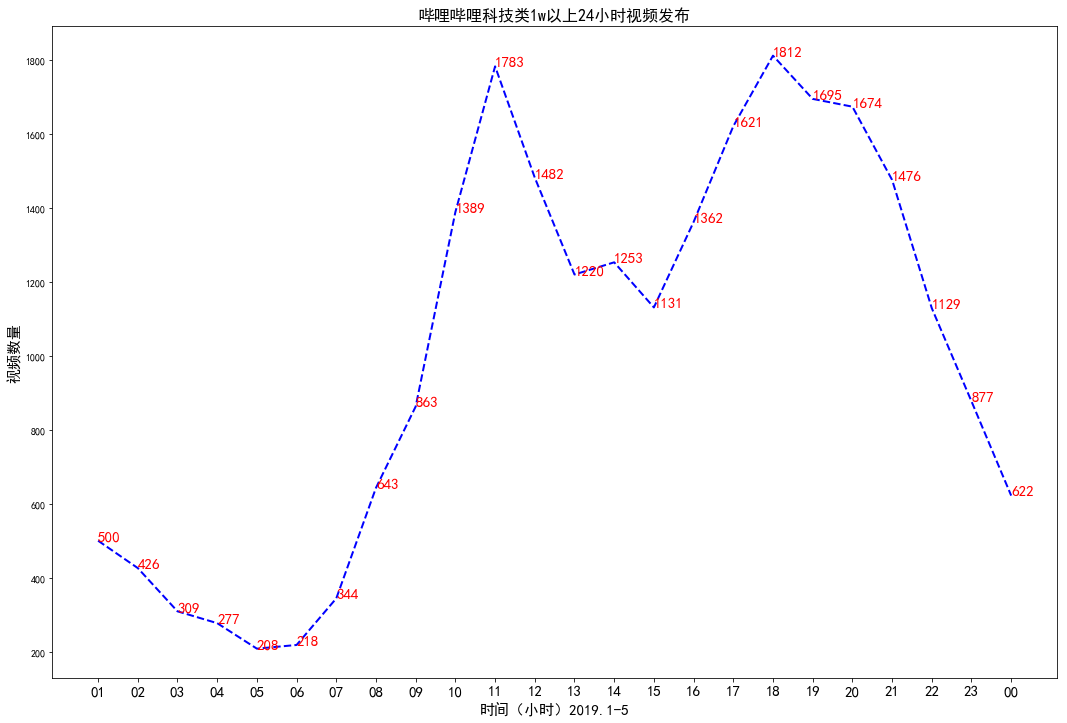

In [93]:
#哔哩哔哩科技类24小时视频发布
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#显示图形
%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
#X轴，Y轴数据
hours = {'01': 500, '02': 426, '03': 309, '04': 277, '05': 208, '06': 218, '07': 344, '08': 643, '09': 863, '10': 1389, '11': 1783, '12': 1482, '13': 1220, '14': 1253, '15': 1131, '16': 1362, '17': 1621, '18': 1812, '19': 1695, '20': 1674, '21': 1476, '22': 1129, '23': 877, '00': 622}
y = []
x = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00']
for xi in x:
    y.append(hours[xi])

plt.figure(figsize=(18,12)) #创建绘图对象
plt.xticks(range(24), x, fontsize=15) # 横坐标
points = plt.plot(x,y,"b--",linewidth=2)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("时间（小时）2019.1-5",fontsize=15) #X轴标签
plt.ylabel("视频数量",fontsize=15)  #Y轴标签
plt.title("哔哩哔哩科技类1w以上24小时视频发布",fontsize=16) #图标题

for i,(_x,_y) in enumerate(zip([i for i in range(len(x))],y)):  
    plt.text(_x,_y,y[i],color='red',fontsize=15,)  #将数值显示在图形上

plt.savefig(r'C:\Users\yc\Desktop\tech_hour.png', dpi=300) #指定分辨率保存  
plt.show()  #显示图

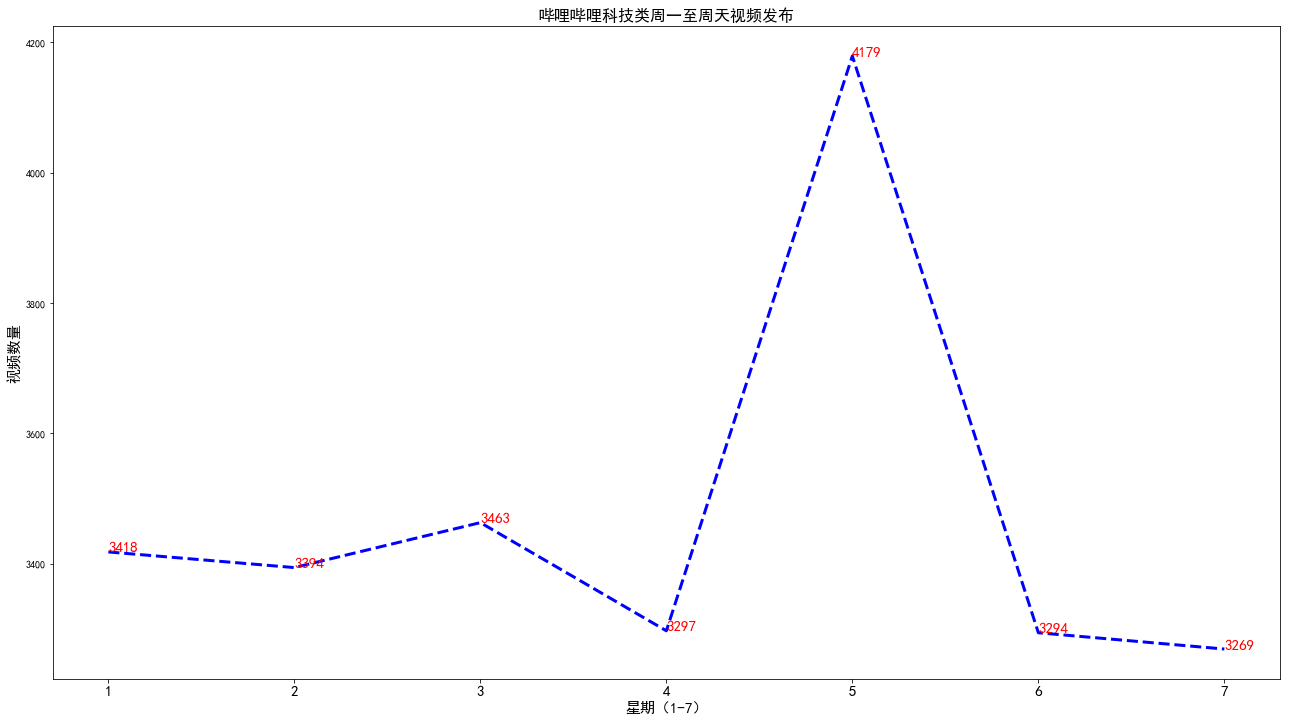

In [92]:
#哔哩哔哩科技类星期视频发布
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#显示图形
%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
#X轴，Y轴数据
x = ['1','2','3','4','5','6','7']
y = [3418, 3394,3463, 3297,4179,3294,3269]

plt.figure(figsize=(22,12)) #创建绘图对象
plt.xticks(range(7), x,fontsize=15) # 横坐标
plt.plot(x,y,"b--",linewidth=3)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("星期（1-7）",fontsize=15) #X轴标签
plt.ylabel("视频数量",fontsize=15)  #Y轴标签
plt.title("哔哩哔哩科技类周一至周天视频发布",fontsize=16) #图标题

for i,(_x,_y) in enumerate(zip([i for i in range(len(x))],y)):  
    plt.text(_x,_y,y[i],color='red',fontsize=15,)  #将数值显示在图形上
    
plt.savefig(r'C:\Users\yc\Desktop\tech_week.png', dpi=300) #指定分辨率保存  
plt.show()  #显示图

('日常', 772)


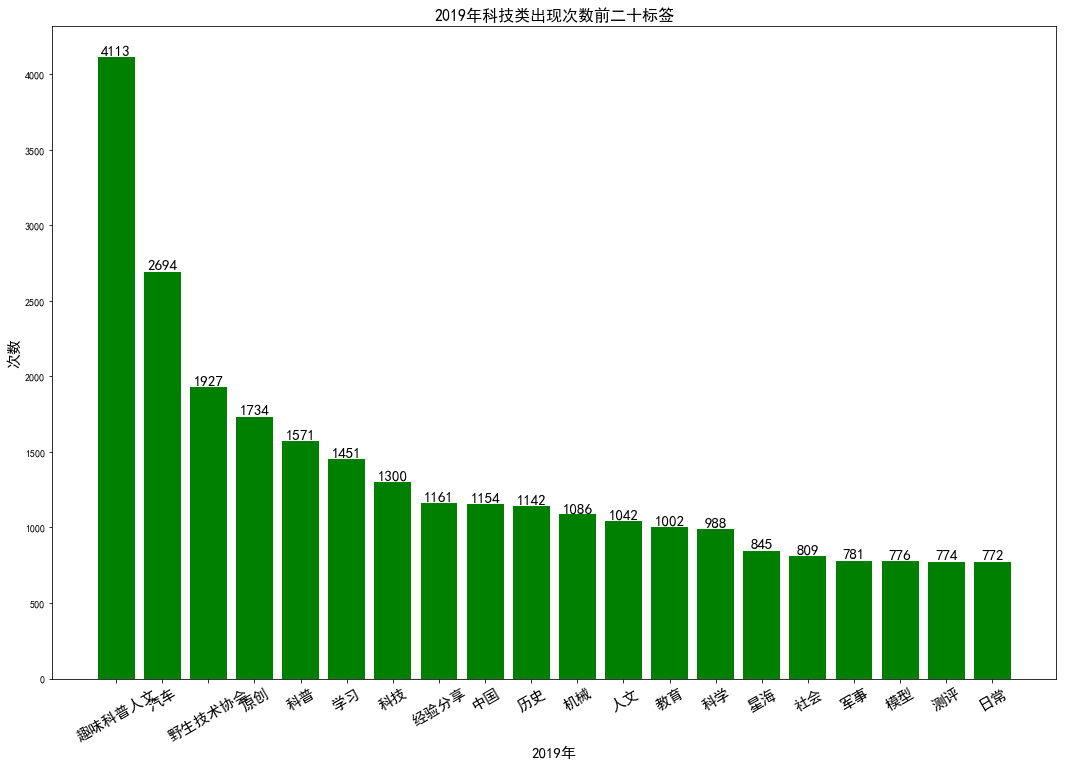

In [110]:
# 科技类标签出现次数前100
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (18.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_counts.txt', 'rb') as f:
    tag_means = pickle.load(f)
tag_means2 = sorted(tag_means.items(), key=lambda item:item[1], reverse=True) # 标签出现次数  
x,y = [],[]
for tag in tag_means2[:20]:
    x.append(tag[0]) # 标签名
    y.append(round(tag[1],1)) # 出现次数
print(tag)
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.xlabel("2019年",fontsize=15)
plt.ylabel("次数",fontsize=15)
plt.title("2019年科技类出现次数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1_tech_tag_counts.png', dpi=300) #指定分辨率保存
plt.show()

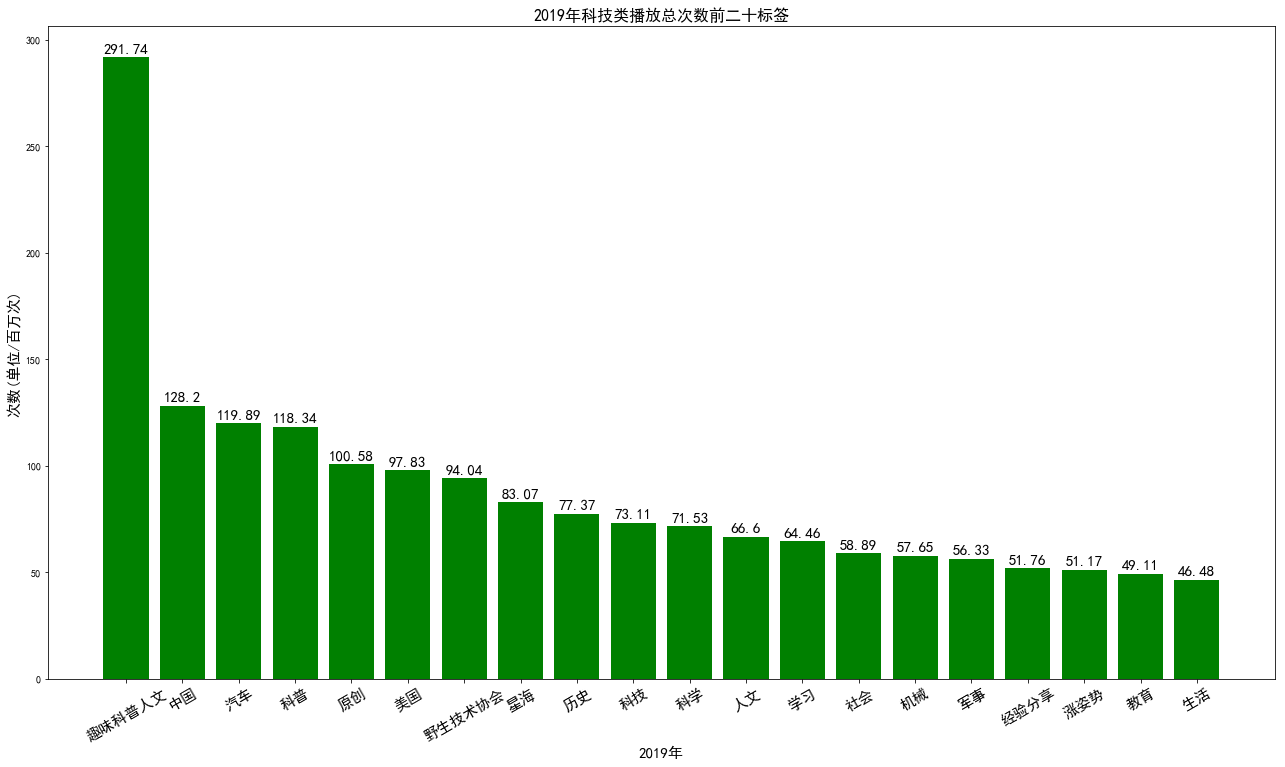

In [44]:
# 科技类前一百标签播放总次数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_play.txt', 'rb') as f:
    tag_means = pickle.load(f)
tag_means2 = sorted(tag_means.items(), key=lambda item:item[1], reverse=True) # 标签相应播放总次数  
x,y2 = [],[]
for tag in tag_means2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 播放总次数
y = [round(y3/1000000,2) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15) # rotation 旋转 90 度
plt.xlabel("2019年",fontsize=15)
plt.ylabel("次数(单位/百万次)",fontsize=15)
plt.title("2019年科技类播放总次数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1tech_tags_play.png', dpi=300) #指定分辨率保存
plt.show()

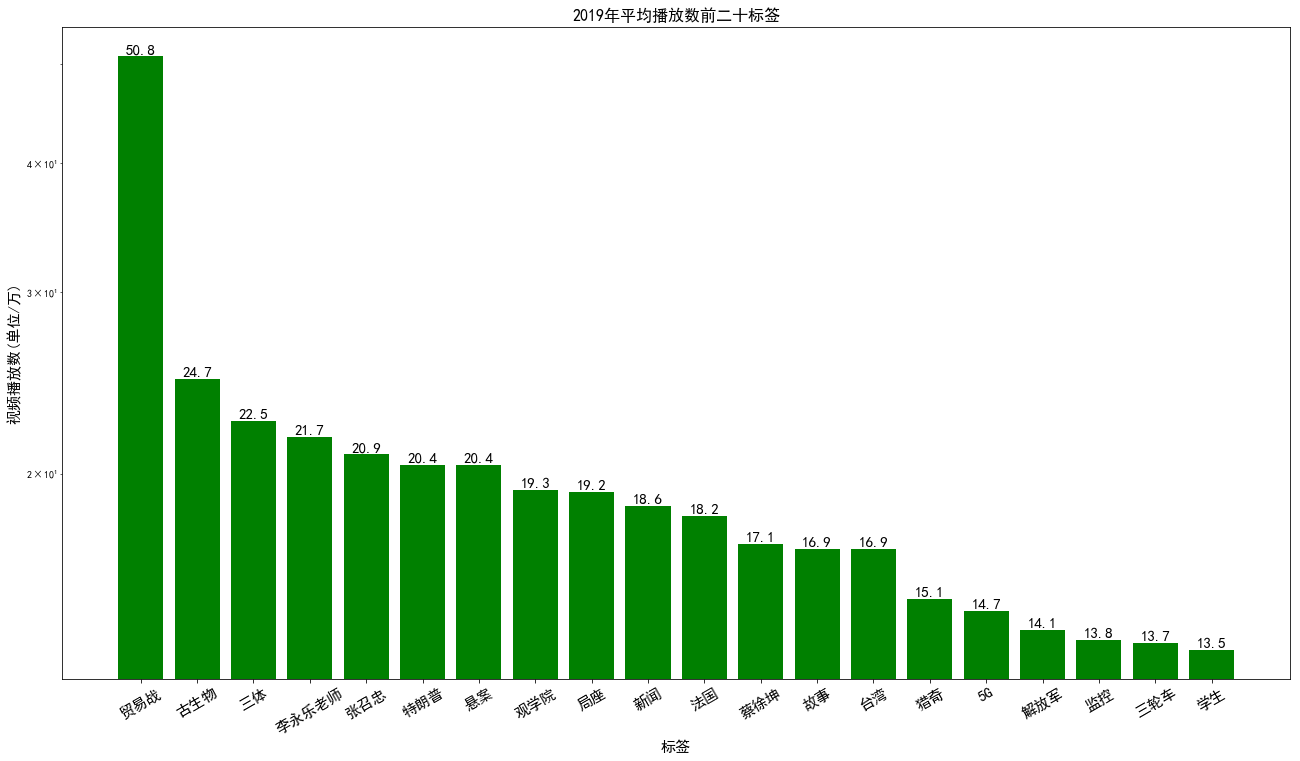

In [46]:
# 科技类前一百标签平均播放量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_play.txt', 'rb') as f:
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\1tech_tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for review in tag_review:
    if tag_counts[review] >= 30: #----增加次数限制----
        r_mean[review] = tag_review[review]/tag_counts[review] # 生成平均评论数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签平均评论量排序 
    
x,y2 = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 标签平均评论数量, 保留一位小数
y = [round(y3/10000,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.yscale('log')
plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("视频播放数(单位/万)",fontsize=15)
plt.title("2019年平均播放数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1tech_play_mean.png', dpi=300) #指定分辨率保存
plt.show()

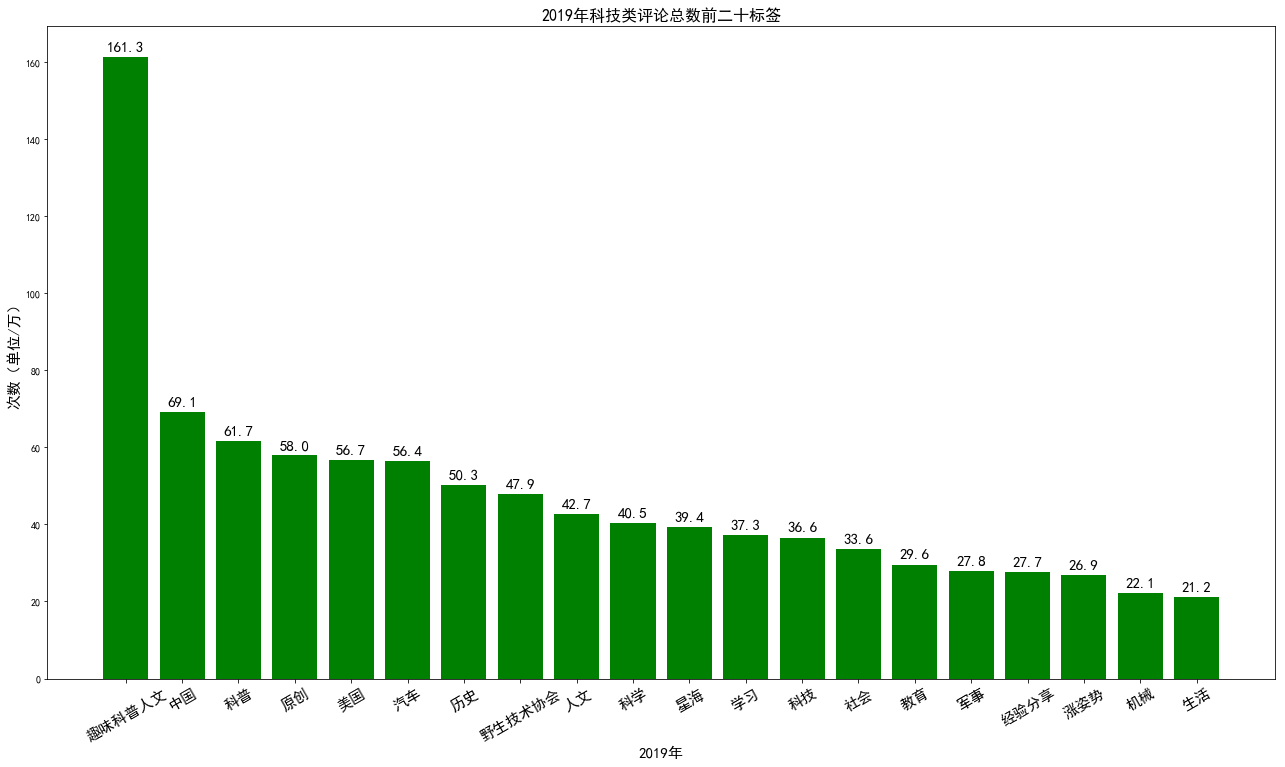

In [47]:
# 科技类前一百标签评论总次数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_review.txt', 'rb') as f:
    tag_means = pickle.load(f)
tag_means2 = sorted(tag_means.items(), key=lambda item:item[1], reverse=True) # 标签相应播放总次数  
x,y2 = [],[]
for tag in tag_means2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 播放总次数
y = [round(y3/10000,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15) # rotation 旋转 90 度
plt.xlabel("2019年",fontsize=15)
plt.ylabel("次数（单位/万）",fontsize=15)
plt.title("2019年科技类评论总数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1tech_tags_view.png', dpi=300) #指定分辨率保存
plt.show()

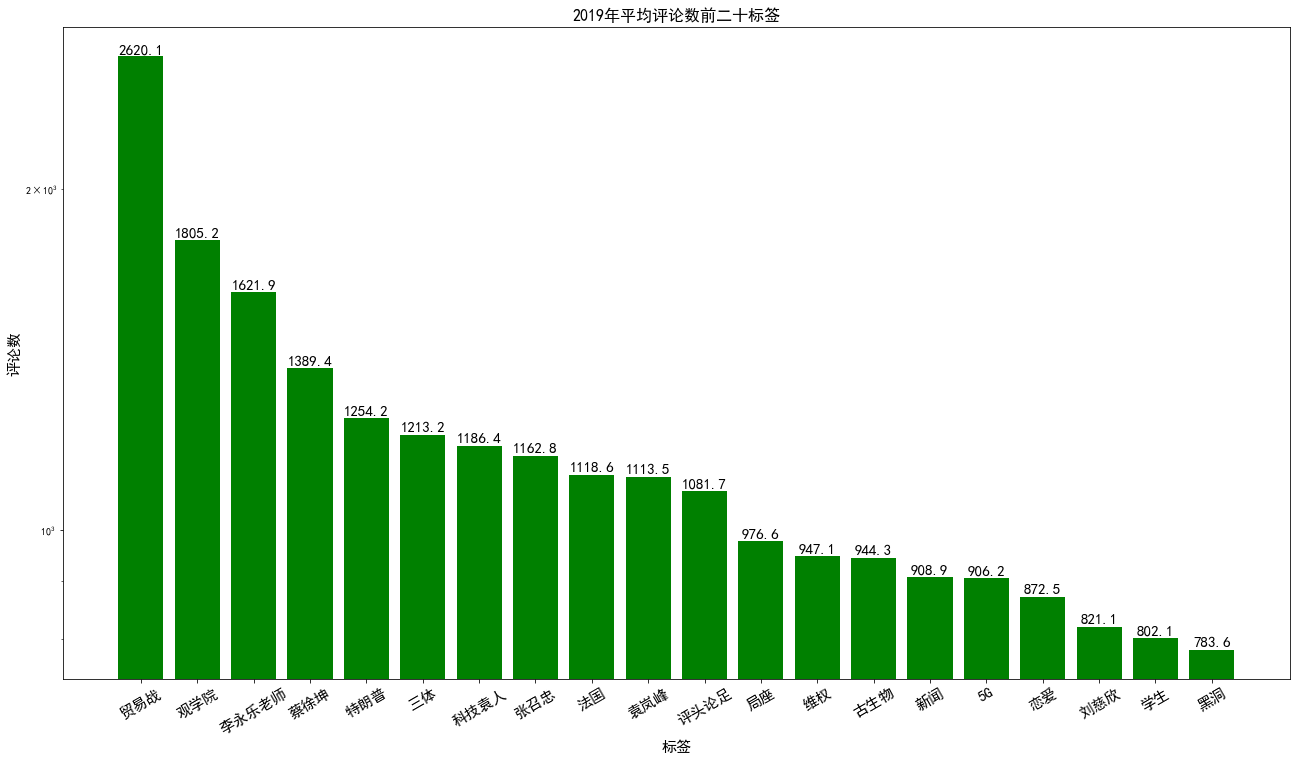

In [114]:
# 科技类前一百标签平均评论量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_review.txt', 'rb') as f:
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\1tech_tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for review in tag_review:
    if tag_counts[review] >= 30: #----增加次数限制----
        r_mean[review] = tag_review[review]/tag_counts[review] # 生成平均评论数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签平均评论量排序 
    
x,y = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y.append(round(tag[1],1)) # 标签平均评论数量, 保留一位小数

rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.yscale('log')
plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("评论数",fontsize=15)
plt.title("2019年平均评论数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1tech_review_mean.png', dpi=300) #指定分辨率保存
plt.show()

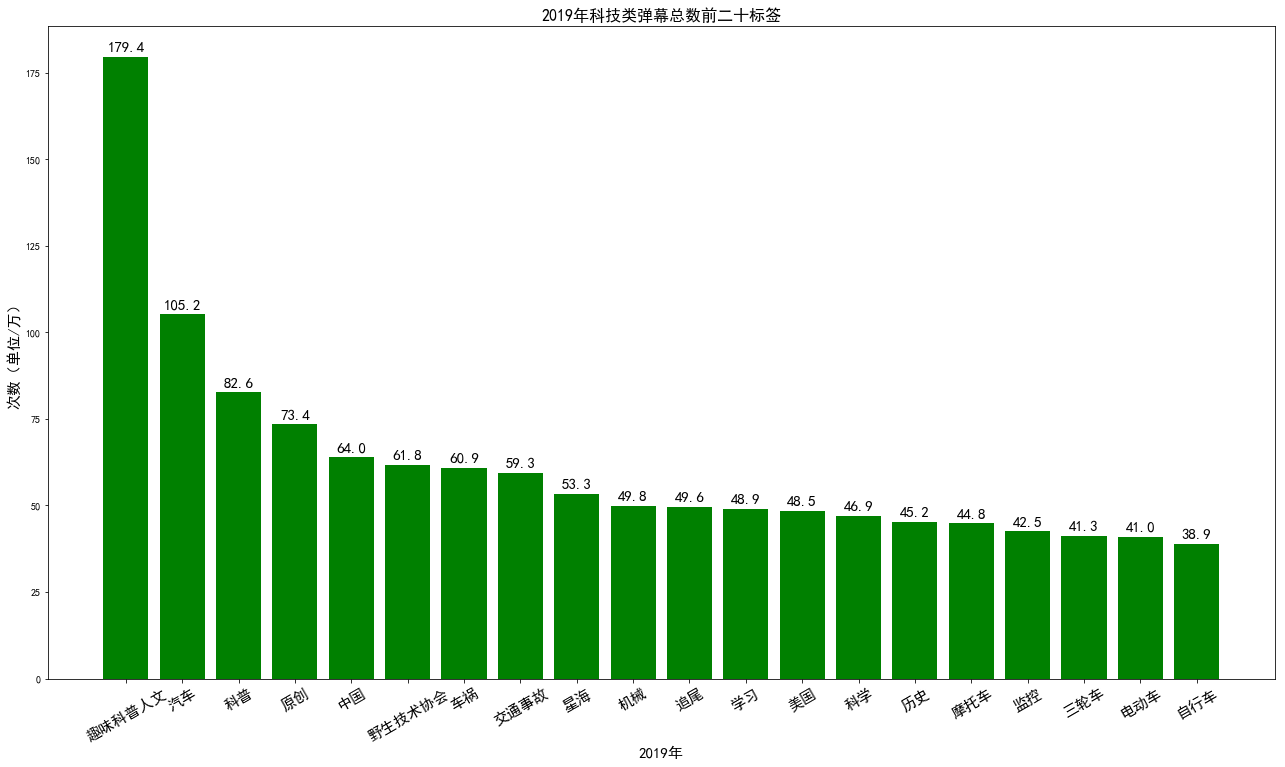

In [48]:
# 科技类前一百标签弹幕总数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_video_review.txt', 'rb') as f:
    tag_means = pickle.load(f)
tag_means2 = sorted(tag_means.items(), key=lambda item:item[1], reverse=True) # 标签相应播放总次数  
x,y2 = [],[]
for tag in tag_means2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 播放总次数
y = [round(y3/10000,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15) # rotation 旋转 90 度
plt.xlabel("2019年",fontsize=15)
plt.ylabel("次数（单位/万）",fontsize=15)
plt.title("2019年科技类弹幕总数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom", fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1tech_tags_video_review.png', dpi=300) #指定分辨率保存
plt.show()

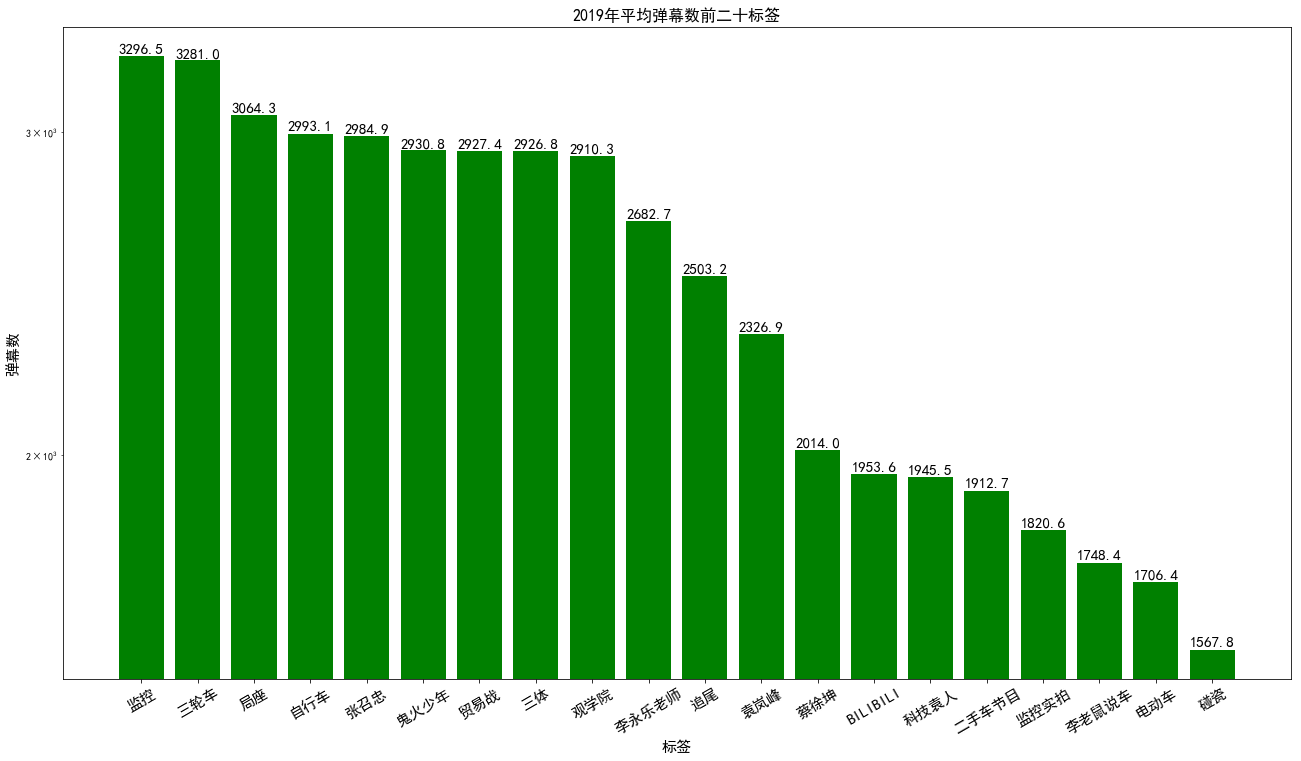

In [117]:
# 科技类前一百标签平均弹幕量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_video_review.txt', 'rb') as f:
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\1tech_tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for review in tag_review:
    if tag_counts[review] >= 30: #----增加次数限制----
        r_mean[review] = tag_review[review]/tag_counts[review] # 生成平均评论数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签平均评论量排序 
    
x,y = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y.append(round(tag[1],1)) # 标签平均评论数量, 保留一位小数

rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.yscale('log')
plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("弹幕数",fontsize=15)
plt.title("2019年平均弹幕数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1tech_video_review_mean.png', dpi=300) #指定分辨率保存
plt.show()

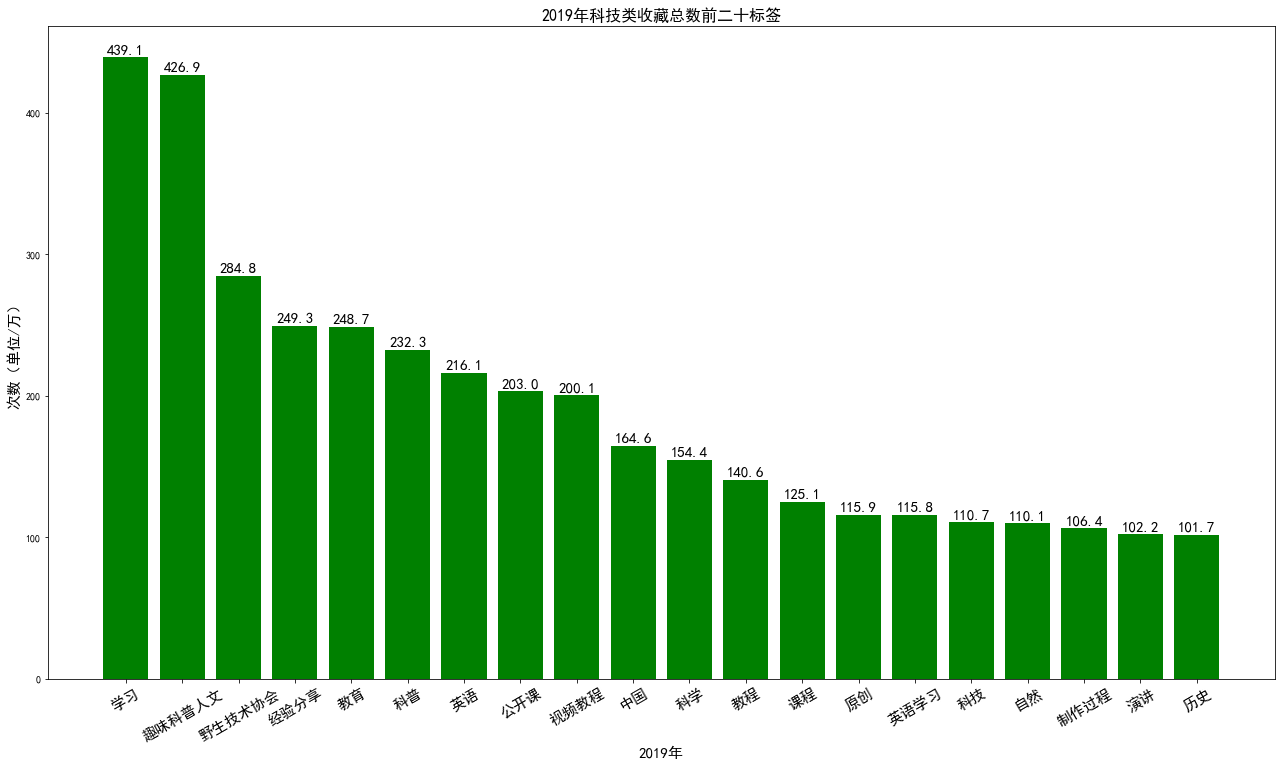

In [49]:
# 科技类前一百标签收藏总数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_favorites.txt', 'rb') as f:
    tag_means = pickle.load(f)
tag_means2 = sorted(tag_means.items(), key=lambda item:item[1], reverse=True) # 标签相应播放总次数  
x,y2 = [],[]
for tag in tag_means2[:20]:
    x.append(tag[0]) # 标签名
    y2.append(round(tag[1],1)) # 播放总次数
y = [round(y3/10000,1) for y3 in y2]
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15) # rotation 旋转 90 度
plt.xlabel("2019年",fontsize=15)
plt.ylabel("次数（单位/万）",fontsize=15)
plt.title("2019年科技类收藏总数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=15)
plt.savefig(r'C:\Users\yc\Desktop\1tech_tags_favorites.png', dpi=300) #指定分辨率保存
plt.show()

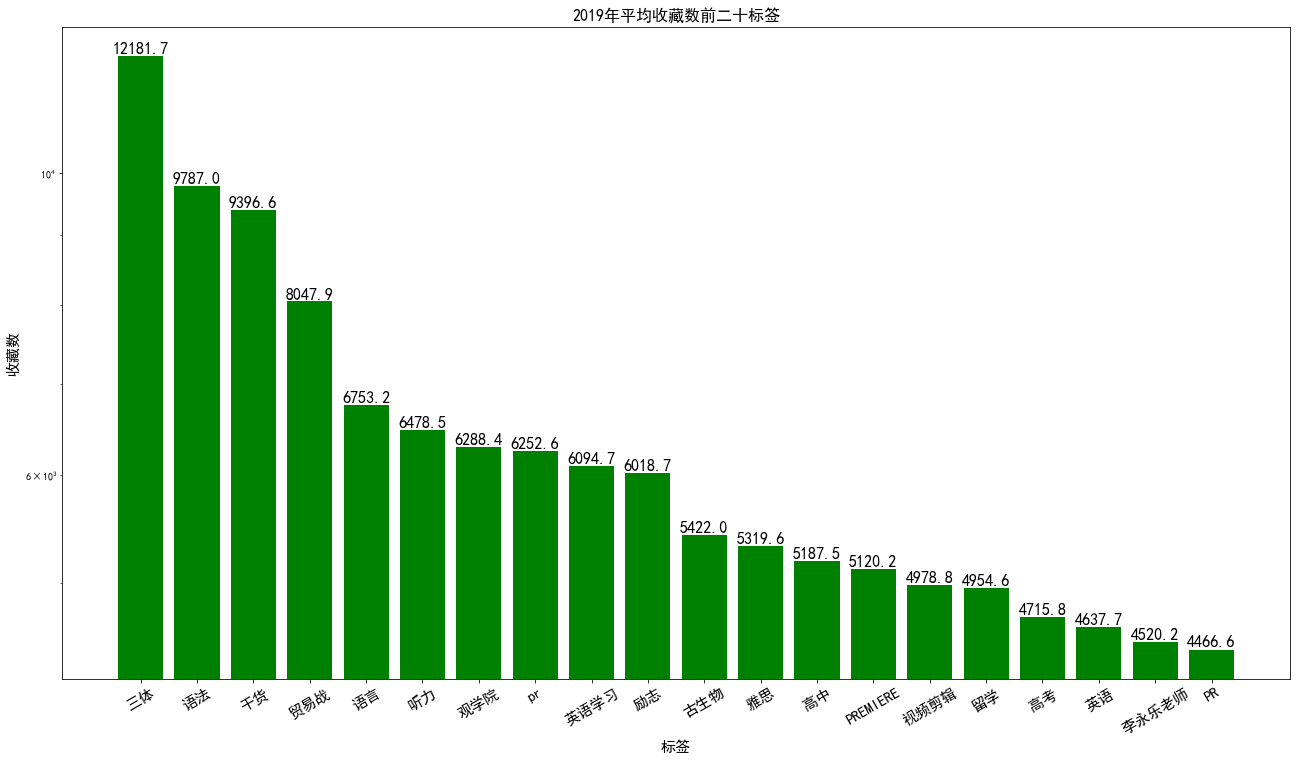

In [122]:
# 科技类前一百标签平均收藏量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

# 数据
with open(r'C:\Users\yc\Desktop\1tech_tag_favorites.txt', 'rb') as f:
    tag_review = pickle.load(f)
with open(r'C:\Users\yc\Desktop\1tech_tag_counts.txt', 'rb') as f:
    tag_counts = pickle.load(f)
r_mean = {}
for review in tag_review:
    if tag_counts[review] >= 30: #----增加次数限制----
        r_mean[review] = tag_review[review]/tag_counts[review] # 生成平均评论数
r_mean2 = sorted(r_mean.items(), key=lambda item:item[1], reverse=True) # 标签平均评论量排序 
    
x,y = [],[]
for tag in r_mean2[:20]:
    x.append(tag[0]) # 标签名
    y.append(round(tag[1],1)) # 标签平均评论数量, 保留一位小数

rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.yscale('log')
plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.xlabel("标签",fontsize=15)
plt.ylabel("收藏数",fontsize=15)
plt.title("2019年平均收藏数前二十标签",fontsize=16)
# 编辑文本
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom",fontsize=16)
plt.savefig(r'C:\Users\yc\Desktop\1tech_favorites_mean.png', dpi=300) #指定分辨率保存
plt.show()

In [ ]:
# 哔哩哔哩2019年6月播放数前10000弹幕数据整理----------------------------------弹幕数据----------------------------------
import pickle
import time
import pymongo

def get_ready(ch='b1_danmu',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready()
ss = mycol.find({})
for i,s in enumerate(ss):
    if i >= 0:
#         print(s['content'])
        content = s['content'] + ','
        with open(r'C:\Users\yc\Desktop\bl_danmu_content.txt', 'a', encoding='utf8') as f:
            f.write(content)

In [ ]:
# 弹幕数据
import pickle
import time
import pymongo

def get_ready(ch='b1_danmu',dbname='blbl'):
    '''数据库调用'''
    global mycol, myclient
    myclient = pymongo.MongoClient("mongodb://localhost:27017/")
    mydb = myclient[dbname]
    mycol = mydb[ch]
get_ready()
ss = mycol.find({})
hours= {'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,'07':0,'08':0,'09':0,'10':0,'11':0,'12':0,'13':0,'14':0,'15':0,'16':0,'17':0,'18':0,'19':0,'20':0,'21':0,'22':0,'23':0,'00':0}
weeks = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'0':0}
for i,s in enumerate(ss):
#     if i <3:
    timestamp = int(s['sendtime'].split(',')[4]) # 时间戳
    time_local = time.localtime(timestamp)
    week = time.strftime("%w",time_local)
    weeks[week] += 1
#     else:
#         break
print(weeks)

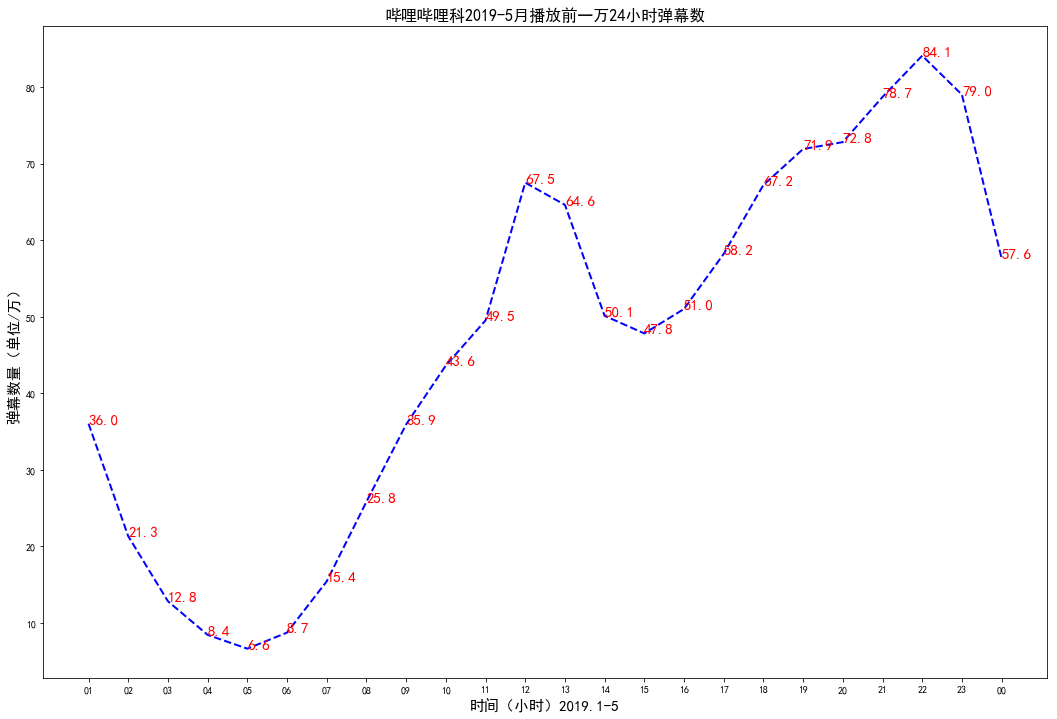

In [52]:
#哔哩哔哩播放数前一万弹幕24小时视频发布
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#显示图形
%matplotlib inline 
# %config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
#X轴，Y轴数据
hours = {'01': 359559, '02': 212504, '03': 128102, '04': 83540, '05': 65592, '06': 87278, '07': 154250, '08': 258439, '09': 358589, '10': 435670, '11': 494683, '12': 675217, '13': 645686, '14': 500691, '15': 478302, '16': 509825, '17': 581508, '18': 671654, '19': 718789, '20': 728195, '21': 787396, '22': 840707, '23': 789810, '00': 575647}
y2 = []
x = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','00']
for xi in x:
    y2.append(hours[xi])
y = [round(y3/10000,1) for y3 in y2]

plt.figure(figsize=(18,12)) #创建绘图对象
plt.xticks(range(24), x) # 横坐标
points = plt.plot(x,y,"b--",linewidth=2)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("时间（小时）2019.1-5",fontsize=15) #X轴标签
plt.ylabel("弹幕数量（单位/万）",fontsize=15)  #Y轴标签
plt.title("哔哩哔哩科2019-5月播放前一万24小时弹幕数",fontsize=16) #图标题

for i,(_x,_y) in enumerate(zip([i for i in range(len(x))],y)):  
    plt.text(_x,_y,y[i],color='red',fontsize=15,)  #将数值显示在图形上

plt.savefig(r'C:\Users\yc\Desktop\before_1_danmu_hour.png', dpi=300) #指定分辨率保存  
plt.show()  #显示图

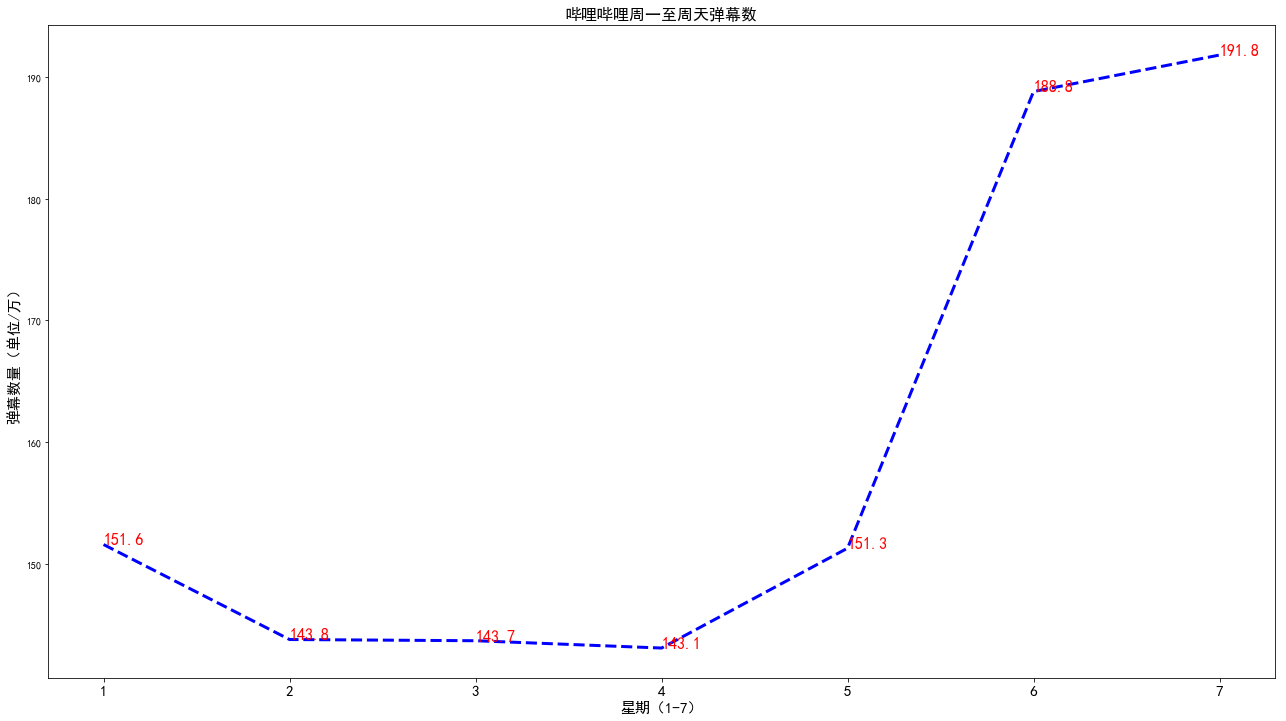

In [53]:
#哔哩哔哩播放数前一万星期弹幕数
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#显示图形
%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
#X轴，Y轴数据
x = ['1','2','3','4','5','6','7']
y2 = [1515849, 1437776, 1437242, 1431191, 1513256, 1888365, 1917954]
y = [round(y3/10000,1) for y3 in y2]
plt.figure(figsize=(22,12)) #创建绘图对象
plt.xticks(range(7), x,fontsize=15) # 横坐标
plt.plot(x,y,"b--",linewidth=3)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xlabel("星期（1-7）",fontsize=15) #X轴标签
plt.ylabel("弹幕数量（单位/万）",fontsize=15)  #Y轴标签
plt.title("哔哩哔哩周一至周天弹幕数",fontsize=16) #图标题

for i,(_x,_y) in enumerate(zip([i for i in range(len(x))],y)):  
    plt.text(_x,_y,y[i],color='red',fontsize=16,)  #将数值显示在图形上
    
plt.savefig(r'C:\Users\yc\Desktop\befor_1_danmu_week.png', dpi=300) #指定分辨率保存  
plt.show()  #显示图

In [ ]:
# 这是使用分词后的权重绘制词云，或者使用分词后的文本绘制,弹幕词云----------------------弹幕词云----------
import jieba.analyse

# 数据生成
jieba.load_userdict(r'C:\Users\yc\Desktop\jieba.txt')
jieba.analyse.set_stop_words(r'C:\Users\yc\Desktop\stop.txt') 
with open(r'C:\Users\yc\Desktop\bl_danmu_content.txt', 'rb' ) as f:
    sentence = f.read()
a = jieba.analyse.extract_tags(sentence, topK=100, withWeight=True, allowPOS=())
print(a)
print(len(a))

In [128]:
#可以手动处理一下数据，比如去重：
a = [('哈哈哈', 0.4591875160568418), ('啊啊啊', 0.0919821146712768), ('弹幕', 0.036986875736520604), ('卧槽', 0.03522970346862418), ('可爱', 0.023768943096542535), ('喜欢', 0.023041769414335094), ('好看', 0.021671121396693), ('awsl', 0.02104553425811477), ('你们', 0.01794751163414934), ('bgm', 0.017362373002967967), ('666', 0.045055235058216715), ('感觉', 0.015488863089257753), ('火钳刘明', 0.014974076891427008), ('真实', 0.01481077034016787), ('泪目', 0.014611206235254621), ('没有', 0.014259030729526877), ('BGM', 0.013205504105035699), ('厉害', 0.012938124258700534), ('好听', 0.012937479156772876), ('2333', 0.04823432897424491), ('为什么', 0.012354364133715316), ('视频', 0.012353206617356302), ('觉得', 0.012298671840533789), ('知道', 0.0119643428349175), ('游戏', 0.011716129788811078), ('加油', 0.011608105533195941), ('自己', 0.011565957711668223), ('好评', 0.011544461970930564), ('...', 0.011403198322718671), ('up', 0.011230678143555705), ('我们', 0.010656561209648871), ('表白', 0.010647548590361516), ('前面', 0.010518755788022537), ('鸡你太美', 0.010038457687552408), ('好像', 0.00995319758206004), ('不要', 0.009876783696795784), ('自由', 0.009768959992460587), ('出来', 0.00965720341306927), ('魔鬼', 0.00910100439887885), ('前方高能', 0.009001409012807424), ('现在', 0.008877757134384), ('老师', 0.008641571750662805), ('警告', 0.00811353320460402), ('鸡鸡', 0.008036032907021758), ('好吃', 0.008026878869606457), ('up主', 0.007064171246787517), ('呜呜', 0.0070206565536881215), ('同款', 0.006978874957089625), ('漂亮', 0.006858922721429099), ('你好', 0.006687389174462215), ('欧拉', 0.006663276563233578), ('舒服', 0.006635685556448243), ('女人', 0.0065214176768155704), ('声音', 0.006517245860883306), ('开花', 0.006437288307014076), ('好帅', 0.006419871024606269), ('生日快乐', 0.006416248822195296), ('小姐姐', 0.006398043439256558), ('谢谢', 0.006344250383276907), ('真香', 0.006333061705276243), ('辛苦', 0.00633136725983657), ('人家', 0.00625601161700368), ('不错', 0.0060047458275914465), ('万一', 0.005986579239659775), ('10', 0.005964475579609052), ('现场', 0.005913735480626972), ('新年快乐', 0.005901086064744083), ('老婆', 0.005882141490534483), ('快乐', 0.005837813439279994), ('大木', 0.005760389456615), ('吴亦凡', 0.005659432916452186), ('字幕', 0.005650100443833065), ('尼玛', 0.005568209688757699), ('直接', 0.005558939741246439), ('电影', 0.005487048513376686), ('别人', 0.005457315585479373), ('魔鬼吗', 0.005452215941479908), ('干嘛', 0.005445736695132996), ('因为', 0.005406851763199951), ('呵呵', 0.005360490234550885), ('阿伟', 0.0053327047559145), ('但是', 0.005317902084180819), ('好好看', 0.005301720528061867), ('中国', 0.005297658539468672), ('蔡徐坤', 0.0052955984603962085), ('弟弟', 0.005258134952190094), ('一直', 0.005180892464379852), ('男人', 0.0051654447504457775), ('滑稽', 0.005159963683938099), ('好好', 0.005148293122348615)]

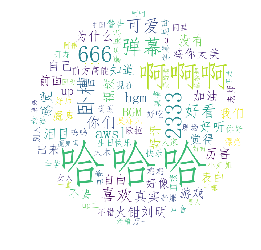

In [129]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

b = {}
for i,j in a:
    b[i] = j
# wordcloud 部分设置
font_path = r'C:\Users\yc\Desktop\SIMFANG.ttf' # 字体 # wordcloud设置
x, y = np.ogrid[:600, :600]
mask = (x - 300) ** 2 + (y - 300) ** 2 > 300 ** 2
mask = 255 * mask.astype(int)

# 设置词云属性
wc = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=2000,  # 词云显示的最大词数
               mask=mask,  # 设置背景图片
               #contour_width=1, 
               contour_color='green')
# 根据频率生成词云
wc.generate_from_frequencies(b)
wc.to_file(r'C:\Users\yc\Desktop\6666.png') # 保存文件
# 显示图片
plt.figure()
plt.imshow(wc)
plt.axis("off")
plt.show()

In [130]:
# 前一万热评分词------------------------------------热评----------------------
import jieba.analyse
import numpy as np

# 数据生成---------------------------
jieba.load_userdict(r'C:\Users\yc\Desktop\jieba2.txt')
jieba.analyse.set_stop_words(r'C:\Users\yc\Desktop\stop2.txt') 
with open(r'C:\Users\yc\Desktop\hotcomment.txt', 'rb' ) as f:
    sentence = f.read()
a = jieba.analyse.extract_tags(sentence, topK=100, withWeight=True, allowPOS=())

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\yc\AppData\Local\Temp\jieba.cache
Loading model cost 0.672 seconds.
Prefix dict has been built succesfully.


In [136]:
a = ('哈哈哈', 0.077995654681533), ('滑稽', 0.03249106957146166), ('up', 0.02267675390574793), ('喜欢', 0.022467964824355362), ('弹幕', 0.01979043307914474), ('蛆音娘', 0.018847633467848544), ('2233', 0.018567453923612), ('粉丝', 0.017528692974701447), ('蔡徐坤', 0.016312675686660796), ('热评', 0.01600581237630649), ('游戏', 0.014398739849706904), ('...', 0.014311393227828364), ('挤挤', 0.013830875542118395), ('评论', 0.01311483666224255), ('up主', 0.013088387280764101), ('为什么', 0.01253779903561169), ('打破', 0.011296779835541346), ('上去', 0.009515441362672227), ('出来', 0.009329710883718196), ('希望', 0.00922131992400844), ('挤一挤', 0.008943508943804487), ('老师', 0.008646954244911442), ('啊啊啊', 0.008391520985698295), ('惨案', 0.00819954881101571), ('点赞', 0.008147443254624477), ('中国', 0.0078991239891958), ('电影', 0.00781925305021179), ('真实', 0.007813060018434794), ('可爱', 0.007382897879778015), ('画风突变', 0.007173485791326026), ('人家', 0.007118863007330177), ('好看', 0.0070872917830300895), ('大佬', 0.006920639560031517), ('害羞', 0.006743144340547166), ('孩子', 0.006734749280434307), ('捕捉', 0.006679456930581117), ('问题', 0.006643948813008182), ('世界', 0.006510433703564858), ('谢谢', 0.0065030039779576014), ('恭喜', 0.006429870158279212), ('洛天依', 0.006332947158616405), ('直播', 0.006232282470154261), ('大师', 0.006078926228916577), ('大笑', 0.006056805782914547), ('剧情', 0.005976524501070251), ('加油', 0.005946422852682714), ('魔鬼', 0.0059234137533136985), ('第一', 0.005807569424516151), ('不好', 0.005755346920649605), ('朋友', 0.0057468347005312235), ('英雄', 0.005689541224583805), ('鬼畜', 0.005648063828260417), ('发现', 0.005622283038622015), ('玩家', 0.0056178401933131925), ('女装', 0.005454749854265971), ('小姐姐', 0.005418975324423542), ('芮小凸', 0.0053367532235531505), ('看看', 0.005307595635920842), ('微笑', 0.005257178839030095), ('手机', 0.00524631454319733), ('恶心', 0.005210404991402534), ('厉害', 0.0051260819885148206), ('今天', 0.0050327910282356786), ('动画', 0.005017098159745791), ('日本', 0.004996648463062908), ('兄弟', 0.004860498324540816), ('沙雕', 0.004771946840727109), ('开心', 0.004680168307458342), ('名字', 0.004675368678785804), ('男主', 0.004660764481903085), ('意思', 0.004546318445863043), ('起来', 0.004513816562478782), ('努力', 0.004501325564746053), ('华为', 0.004466292483182271), ('时间', 0.004464867402092453), ('举报', 0.0044537283385028565), ('女主', 0.0043627957602547), ('当时', 0.0043416941538572795), ('女生', 0.004328394592688205), ('秀儿', 0.004318322816725091), ('肯定', 0.004299943341656241), ('就算', 0.004295094154380103), ('微博', 0.0042649552844895595), ('故事', 0.004248585686968604), ('节目', 0.004221211074028569), ('抄袭', 0.004219629441244686), ('科普', 0.004219399457169136), ('封面', 0.0042095980665844005), ('卧槽', 0.004209350774926073), ('生活', 0.004075166424963322), ('快乐', 0.004060531273158801), ('关注', 0.004008022548463349), ('不错', 0.0039895142277401605), ('特别', 0.003986342028814262), ('其他', 0.003974369276464505), ('观众', 0.00397030798191199), ('大哭', 0.003948087803396442), ('抖音', 0.003926960913664526)

In [135]:
0.049935399876579835 + 0.009570750037083724 + 0.018489504767869442

0.077995654681533

[('哈哈哈', 0.077995654681533), ('滑稽', 0.03249106957146166), ('up', 0.02267675390574793), ('喜欢', 0.022467964824355362), ('弹幕', 0.01979043307914474), ('蛆音娘', 0.018847633467848544), ('2233', 0.018567453923612), ('粉丝', 0.017528692974701447), ('蔡徐坤', 0.016312675686660796), ('热评', 0.01600581237630649), ('游戏', 0.014398739849706904), ('...', 0.014311393227828364), ('挤挤', 0.013830875542118395), ('评论', 0.01311483666224255), ('up主', 0.013088387280764101), ('为什么', 0.01253779903561169), ('打破', 0.011296779835541346), ('上去', 0.009515441362672227), ('出来', 0.009329710883718196), ('希望', 0.00922131992400844), ('挤一挤', 0.008943508943804487), ('老师', 0.008646954244911442), ('啊啊啊', 0.008391520985698295), ('惨案', 0.00819954881101571), ('点赞', 0.008147443254624477), ('中国', 0.0078991239891958), ('电影', 0.00781925305021179), ('真实', 0.007813060018434794), ('可爱', 0.007382897879778015), ('画风突变', 0.007173485791326026), ('人家', 0.007118863007330177), ('好看', 0.0070872917830300895), ('大佬', 0.006920639560031517), ('害羞', 0.0067

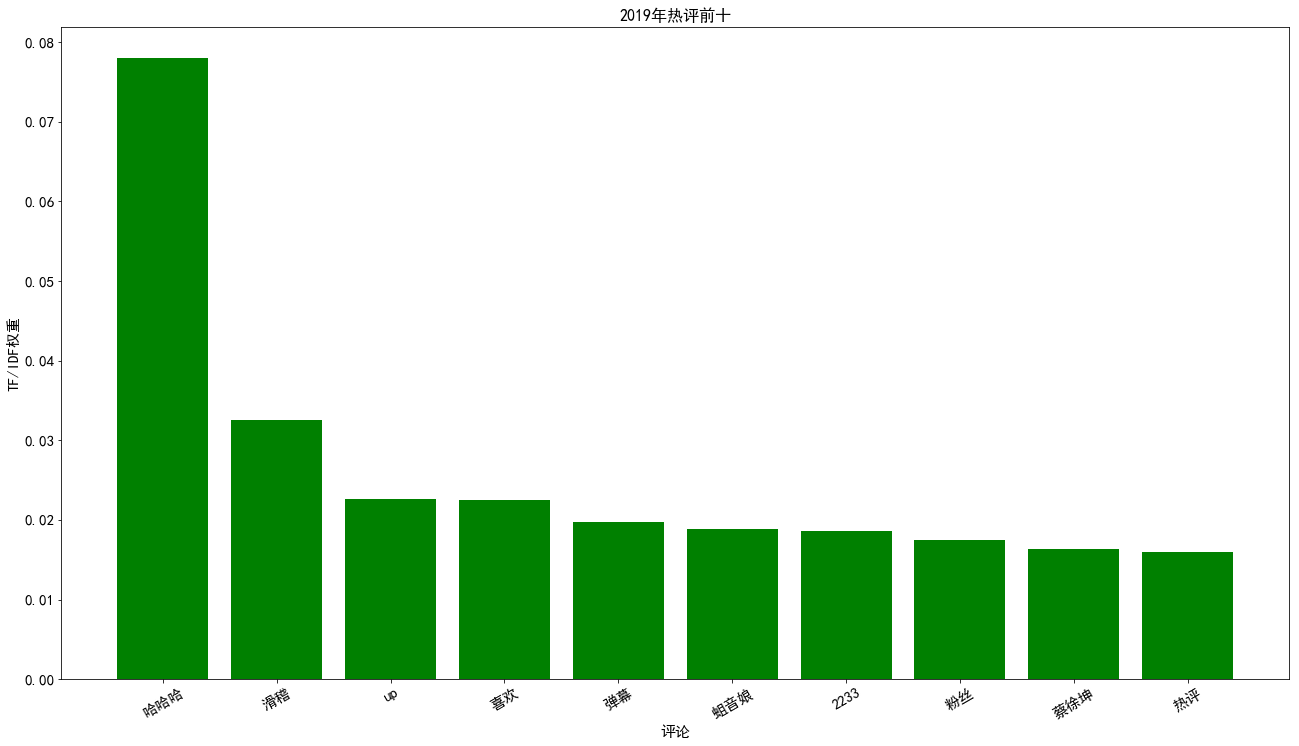

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
#显示图形
#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

r_mean2 = sorted(a, key=lambda item:item[1], reverse=True) # 标签平均时长量排序 ， 降序
print(r_mean2)  
x,y = [],[]
for tag in r_mean2[:10]:
    x.append(tag[0]) # 标签名
    y.append(tag[1]) # 标签平均时长数量, 保留一位小数
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, rotation=30,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("评论",fontsize=15)
plt.ylabel("TF/IDF权重",fontsize=15)
plt.title("2019年热评前十",fontsize=16)

plt.savefig(r'C:\Users\yc\Desktop\b1w_hot_comment.png', dpi=300) #指定分辨率保存
plt.show()

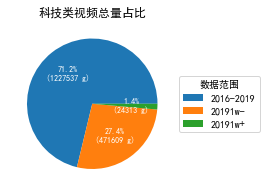

In [141]:
# 简单分析----------------------------------------总结-------------------------------------------
# 科技类
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["1227537 g 2016-2019",
          "471610 g 20191w-",
          "24314 g 20191w+"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="数据范围",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("科技类视频总量占比")
plt.savefig(r'C:\Users\yc\Desktop\tech-pie.png', dpi=300)


plt.show()

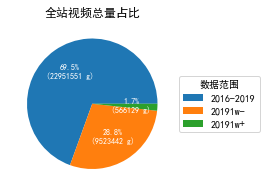

In [142]:
# 哔哩哔哩全站
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["22951552 g 2016-2019",
          "9523442 g 20191w-",
          "566130 g 20191w+"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="数据范围",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title("全站视频总量占比")
plt.savefig(r'C:\Users\yc\Desktop\total-pie.png', dpi=300)

plt.show()

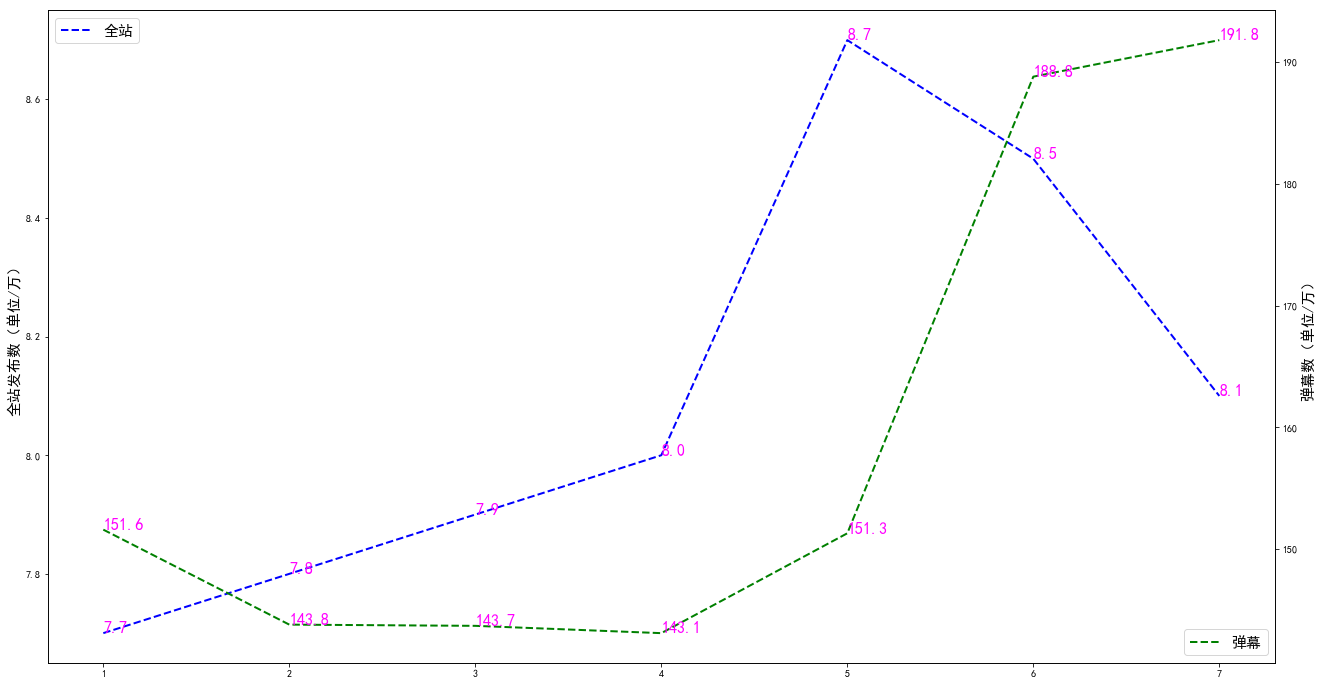

In [55]:
# 星期发布与弹幕的关系
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸


ind = np.arange(7)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots() # 得到 ax 
# 折线图 1 视频发布数
y21 = [76641,78336,79189,79859,86656,84688,80761]
y2 = [round(y3/10000,1) for y3 in y21]
for i,(_x,_y) in enumerate(zip(ind,y2)):  
    plt.text(_x,_y,y2[i],color='magenta',fontsize=16,)  #将数值显示在图形上
ax.set_ylabel('全站发布数（单位/万）', fontsize=15)
points2 = plt.plot(y2,"b--",linewidth=2, label='全站')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax.legend(loc=2, prop={'family':'SimHei','size':15})

# 折线图 2 弹幕数
y11 = [1515849, 1437776, 1437242, 1431191, 1513256, 1888365, 1917954]
y1 = [round(y4/10000,1) for y4 in y11]
ax2 = ax.twinx()  # 得到 ax2
for i,(_x,_y) in enumerate(zip(ind,y1)):  
    plt.text(_x,_y,y1[i],color='magenta',fontsize=16,)  #将数值显示在图形上
ax2.set_ylabel('弹幕数（单位/万）', fontsize=15)
points = plt.plot(y1,"g--",linewidth=2, label='弹幕')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax2.legend(loc=4, prop={'family':'SimHei','size':15})

plt.xticks(ind, ('1','2','3','4','5','6','7')) # x 刻度
plt.savefig(r'C:\Users\yc\Desktop\弹幕-pub-week.png', dpi=300)
plt.show()

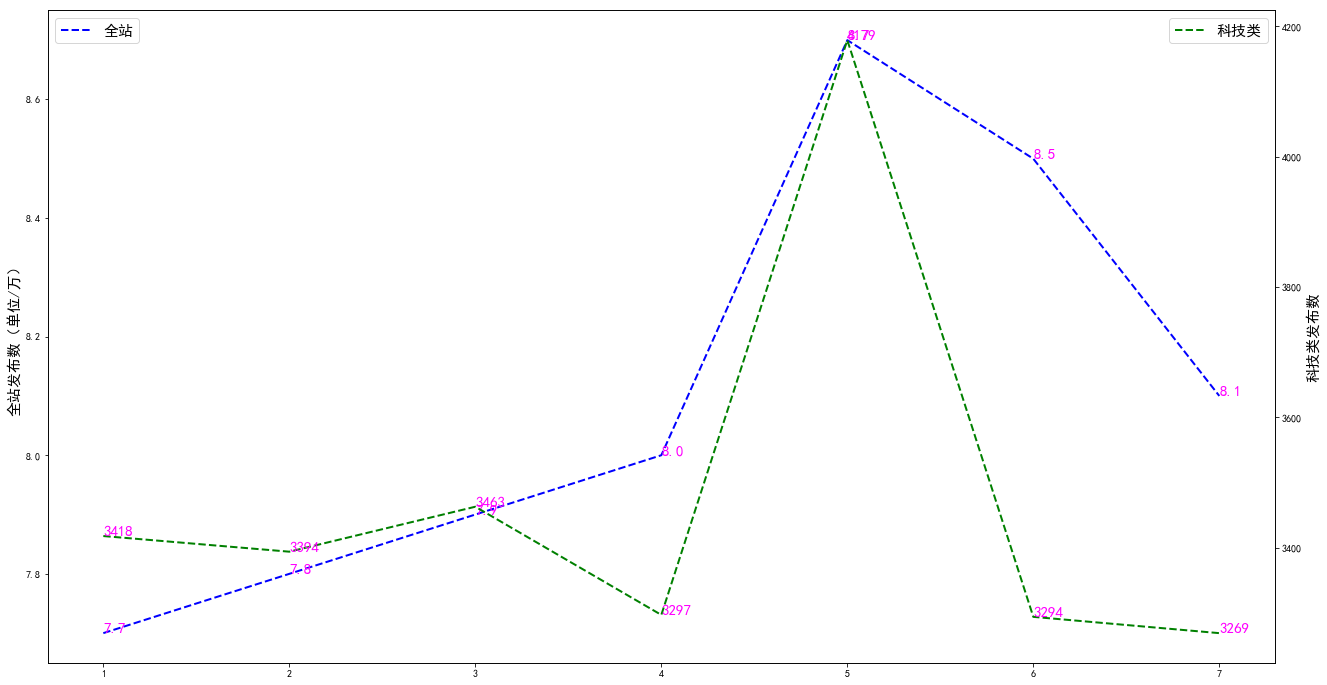

In [57]:
# 星期发布的关系
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸


ind = np.arange(7)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots() # 得到 ax 
# 折线图 1 全站
y21 = [76641,78336,79189,79859,86656,84688,80761]
y2 = [round(y3/10000,1) for y3 in y21]
for i,(_x,_y) in enumerate(zip(ind,y2)):  
    plt.text(_x,_y,y2[i],color='magenta',fontsize=15,)  #将数值显示在图形上
ax.set_ylabel('全站发布数（单位/万）', fontsize=15)
points2 = plt.plot(y2,"b--",linewidth=2, label='全站')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax.legend(loc=2, prop={'family':'SimHei','size':15})

# 折线图 2 科技类
y1 = [3418, 3394,3463, 3297,4179,3294,3269]
ax2 = ax.twinx()  # 得到 ax2
for i,(_x,_y) in enumerate(zip(ind,y1)):  
    plt.text(_x,_y,y1[i],color='magenta',fontsize=15,)  #将数值显示在图形上
ax2.set_ylabel('科技类发布数', fontsize=15)
points = plt.plot(y1,"g--",linewidth=2, label='科技类')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax2.legend(loc=1, prop={'family':'SimHei','size':15})

plt.xticks(ind, ('1','2','3','4','5','6','7')) # x 刻度
plt.savefig(r'C:\Users\yc\Desktop\1tech-all-pub-week.png', dpi=300)
plt.show()

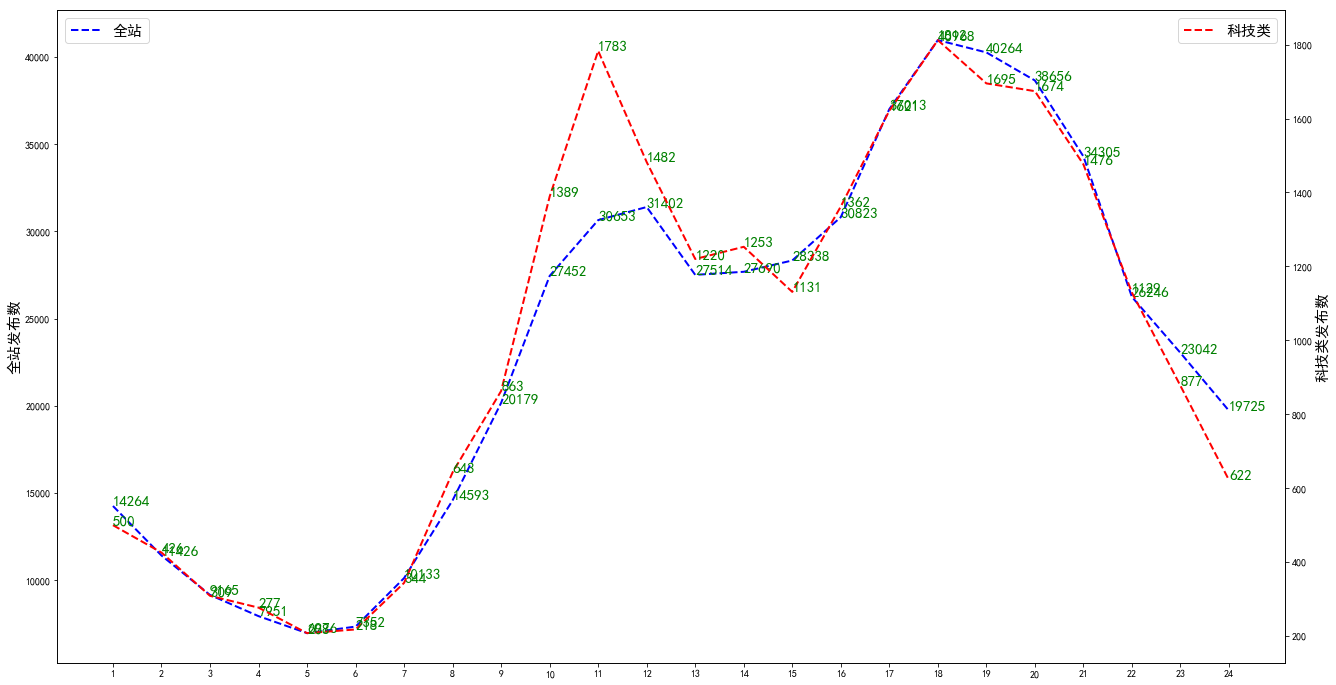

In [145]:
# 小时发布的关系
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸


ind = np.arange(24)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots() # 得到 ax 
# 折线图 1
y2 = [14264,11426,9165,7951,6976,7352,10133,14593,20179,27452,30653,31402,27514,27690,28338,30823,37013,40968,40264,38656,34305,26246,23042,19725]
for i,(_x,_y) in enumerate(zip(ind,y2)):  
    plt.text(_x,_y,y2[i],color='green',fontsize=15,)  #将数值显示在图形上
ax.set_ylabel('全站发布数', fontsize=15)
points2 = plt.plot(y2,"b--",linewidth=2, label='全站')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax.legend(loc=2, prop={'family':'SimHei','size':15})

# 折线图 2 
y1 = [500, 426, 309, 277, 208, 218, 344, 643, 863, 1389, 1783, 1482, 1220, 1253, 1131, 1362, 1621, 1812, 1695, 1674, 1476, 1129, 877, 622]
ax2 = ax.twinx()  # 得到 ax2
for i,(_x,_y) in enumerate(zip(ind,y1)):  
    plt.text(_x,_y,y1[i],color='green',fontsize=15,)  #将数值显示在图形上
ax2.set_ylabel('科技类发布数', fontsize=15)
points = plt.plot(y1,"r--",linewidth=2, label='科技类')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax2.legend(loc=1, prop={'family':'SimHei','size':15})

plt.xticks(ind, ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'),fontsize=15) # x 刻度
plt.savefig(r'C:\Users\yc\Desktop\1tech-all-pub-hour.png', dpi=300)
plt.show()

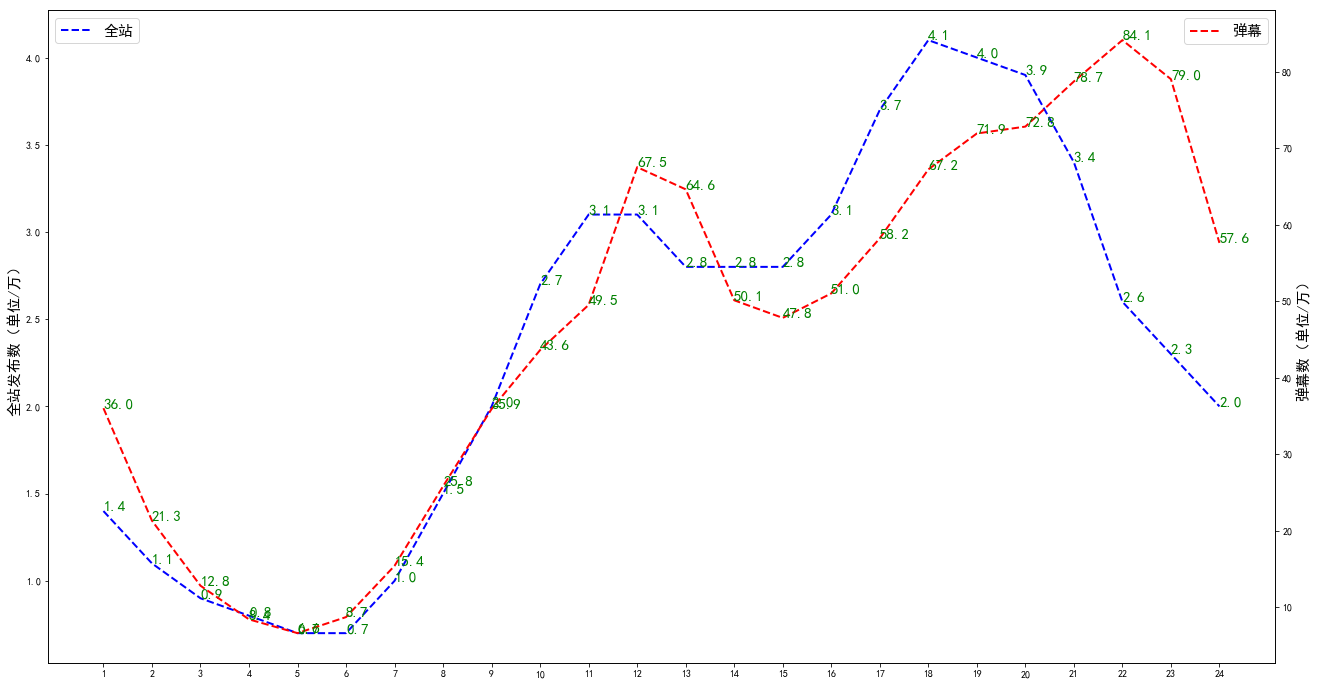

In [59]:
# 小时发布的关系
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸


ind = np.arange(24)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots() # 得到 ax 
# 折线图 1
y21 = [14264,11426,9165,7951,6976,7352,10133,14593,20179,27452,30653,31402,27514,27690,28338,30823,37013,40968,40264,38656,34305,26246,23042,19725]
y2 = [round(y3/10000,1) for y3 in y21]
for i,(_x,_y) in enumerate(zip(ind,y2)):  
    plt.text(_x,_y,y2[i],color='green',fontsize=15,)  #将数值显示在图形上
ax.set_ylabel('全站发布数（单位/万）', fontsize=15)
points2 = plt.plot(y2,"b--",linewidth=2, label='全站')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax.legend(loc=2, prop={'family':'SimHei','size':15})

# 折线图 2 弹幕数
y11 = [359559,212504, 128102, 83540, 65592, 87278, 154250, 258439,  358589, 435670, 494683, 675217, 645686, 500691,478302, 509825, 581508,  671654, 718789, 728195, 787396, 840707,  789810, 575647]
y1 = [round(y4/10000,1) for y4 in y11]
ax2 = ax.twinx()  # 得到 ax2
for i,(_x,_y) in enumerate(zip(ind,y1)):  
    plt.text(_x,_y,y1[i],color='green',fontsize=15,)  #将数值显示在图形上
ax2.set_ylabel('弹幕数（单位/万）', fontsize=15)
points = plt.plot(y1,"r--",linewidth=2, label='弹幕')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax2.legend(loc=1, prop={'family':'SimHei','size':15})

plt.xticks(ind, ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24')) # x 刻度
plt.savefig(r'C:\Users\yc\Desktop\danmaku-all-pub-hour.png', dpi=300)
plt.show()

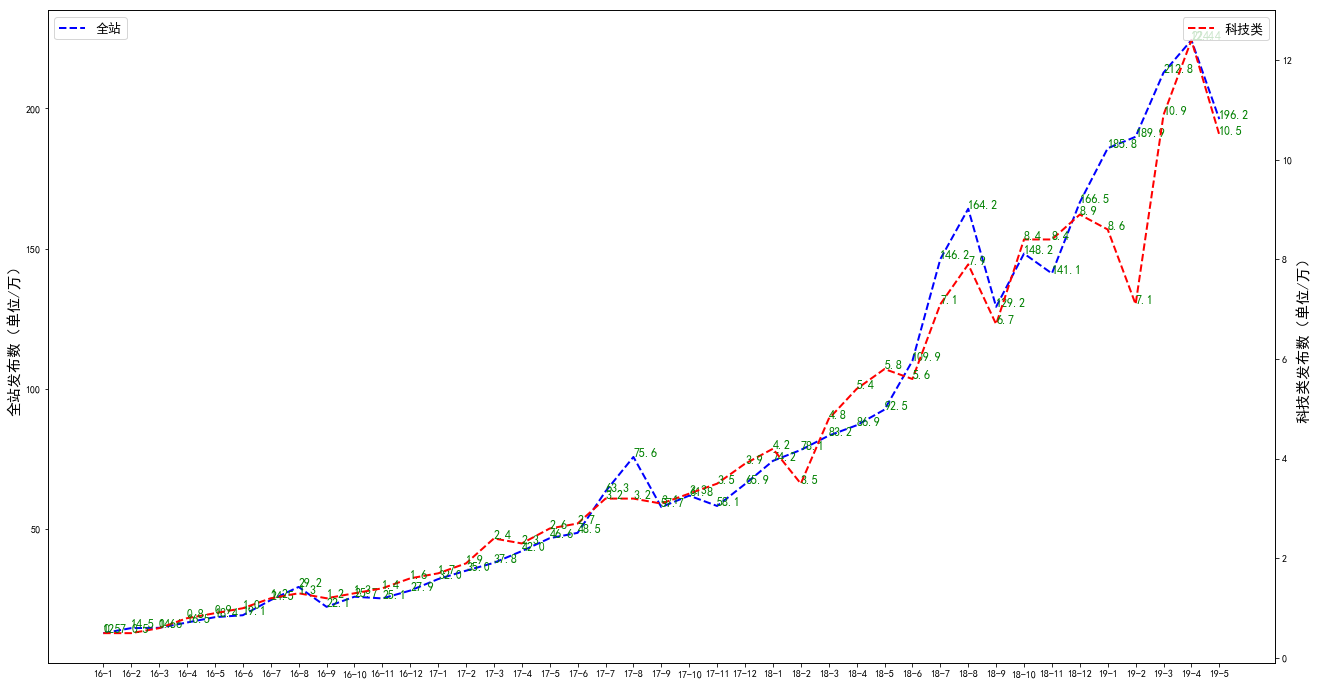

In [61]:
# 月发布的关系
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸


ind = np.arange(41)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots() # 得到 ax 
# 折线图 1
y21 = [127142 , 144981 , 146485 , 165215 , 184462, 191287 , 244826 , 292480 , 220947 , 256718 ,250960 , 279373 , 320269 , 349943 , 377656 ,419977 , 466125 , 485402 , 632708 , 756006 ,577287 , 617933 , 581094 , 658854 , 741934 ,781362 , 831892 , 869494 , 924825 , 1099378 ,1462424 , 1642323 , 1291676 , 1481535 , 1411200 ,1665379 , 1857529 , 1898728 , 2128177 , 2243507 , 1961631]
y2 = [round(y3/10000,1) for y3 in y21]
for i,(_x,_y) in enumerate(zip(ind,y2)):  
    plt.text(_x,_y,y2[i],color='green',fontsize=12,)  #将数值显示在图形上
ax.set_ylabel('全站发布数（单位/万）', fontsize=15)
points2 = plt.plot(y2,"b--",linewidth=2, label='全站')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax.legend(loc=2, prop={'family':'SimHei','size':13})

# 折线图 2 
y11 = [4906 , 5103 , 6363 , 7621 , 8816 ,9546 , 12238 , 13458 , 11559 , 13323 ,14166 , 16153 , 17461 , 19261 , 24238 ,23466 , 26438 , 27209 , 31888 , 31577 ,30859 , 32639 , 34999 , 38651 , 41973 ,35295 , 47681 , 53990 , 57984 , 56214 ,71241 , 78512 , 66730 , 83795 , 83504 ,88680 , 86352 , 71130 , 109350 , 123742 , 105350]
y1 = [round(y4/10000,1) for y4 in y11]
ax2 = ax.twinx()  # 得到 ax2
for i,(_x,_y) in enumerate(zip(ind,y1)):  
    plt.text(_x,_y,y1[i],color='green',fontsize=12,)  #将数值显示在图形上
ax2.set_ylabel('科技类发布数（单位/万）', fontsize=15)
points = plt.plot(y1,"r--",linewidth=2, label='科技类')   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
ax2.legend(loc=1, prop={'family':'SimHei','size':13})

plt.xticks(ind, ('16-1', '16-2', '16-3', '16-4', '16-5', '16-6', '16-7', '16-8', '16-9', '16-10', '16-11', '16-12','17-1', '17-2', '17-3', '17-4', '17-5', '17-6', '17-7', '17-8', '17-9', '17-10', '17-11', '17-12','18-1','18-2','18-3','18-4','18-5','18-6','18-7','18-8','18-9','18-10','18-11','18-12','19-1','19-2','19-3','19-4','19-5'), rotation=90) # x 刻度
plt.savefig(r'C:\Users\yc\Desktop\1tech-all-pub-month.png', dpi=300)
plt.show()

In [1]:
# 视频名 词云制作
import jieba.analyse
import numpy as np

# 数据生成---------------------------
jieba.load_userdict(r'C:\Users\yc\Desktop\jieba2.txt')
jieba.analyse.set_stop_words(r'C:\Users\yc\Desktop\stop2.txt') 
with open(r'C:\Users\yc\Desktop\title_bl.txt', 'rb' ) as f:
    sentence = f.read()
a = jieba.analyse.extract_tags(sentence, topK=200, withWeight=True, allowPOS=())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yc\AppData\Local\Temp\jieba.cache
Loading model cost 0.660 seconds.
Prefix dict has been built succesfully.


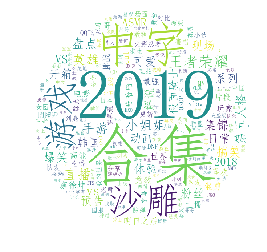

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

b = {}
for i,j in a:
    b[i] = j

# wordcloud 部分设置
font_path = r'C:\Users\yc\Desktop\SIMFANG.ttf' # 字体 # wordcloud设置
x, y = np.ogrid[:600, :600]
mask = (x - 300) ** 2 + (y - 300) ** 2 > 300 ** 2
mask = 255 * mask.astype(int)

# 设置词云属性
wc = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=2000,  # 词云显示的最大词数
               mask=mask,  # 设置背景图片
               #contour_width=1, 
               contour_color='green'
               )
# 根据频率生成词云
wc.generate_from_frequencies(b)
wc.to_file(r'C:\Users\yc\Desktop\all_title.png') # 保存文件
# 显示图片
plt.figure()
plt.imshow(wc)
plt.axis("off")

plt.show()

In [3]:
# 将 pickle 序列化文件用 json 序列化为可读的文件（方便大家直接观看过程数据） 示例 
import pickle
import json
with open(r'C:\Users\yc\Desktop\1tech_tag_favorites.txt', 'rb') as f:
    play = pickle.load(f)
# 数据存为 json
with open(r'C:\Users\yc\Desktop\1tech_tag_favo9rites.json', 'w', encoding='utf8') as f:
    json.dump(play, f, ensure_ascii=False)